### Load packages and CSV

In [5]:
#!/usr/bin/env Rscript

# Load libraries
require(ggplot2)

# Step 1: Read the CSV file
bids <- "/om2/user/mabdel03/files/Ravi_ISO_MRI/reformatted/"
#csv_path <- "/users/stevenmeisler/Downloads/ravi/slm_data3_with_qc.csv"
csv_path <- "/om2/user/mabdel03/files/Ravi_ISO_MRI/Final_Data/code/slm_data3_with_qc.csv"
read_csv <- file.path(csv_path)
data <- read.csv(read_csv)
colnames <- names(data)

# Extract subsets with QC
fmri_data <- subset(data, fmri_qc == 1)
dwi_data <- subset(data, dwi_qc == 1)
anat_data <- subset(data, anat_qc == 1)


In [7]:
forceps_path <- '/home/rraju/t1t2_ratio_results/t1t2_ratio_summary.csv'
read_forceps <- file.path(forceps_path)
forceps_measures <- read.csv(read_forceps)

In [9]:
forceps_measures$subject_id <- paste0("sub-", forceps_measures$subject_id)
forceps_measures

subject_id,session_id,mean_t1t2_ratio
<chr>,<int>,<dbl>
sub-582981,0,2.228810
sub-807897,4,1.882600
sub-1172523,4,2.020460
sub-1841461,2,4.012510
sub-1878130,3,1.493540
sub-2158395,0,1.251770
sub-2371278,0,5.096890
sub-2695917,2,2.622540
sub-2732911,0,3.895900


In [2]:
dwi_data

,subject,fmri_qc,dwi_qc,anat_qc,has_pheno,pheno_fu_year,pheno_age_at_visit,pheno_cogn_global,pheno_cesdsum,pheno_r_depres,⋯,bold_AAL_Vermis_4_5_t1t2ratio,bold_AAL_Vermis_6_t1t2ratio,bold_AAL_Vermis_7_t1t2ratio,bold_AAL_Vermis_8_t1t2ratio,bold_AAL_Vermis_9_t1t2ratio,bold_AAL_Vermis_10_t1t2ratio,anat_xgbscore,dwi_neighbor_corr,bold_fd_mean,bold_n_outliers
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,sub-00582981,1,1,0,1,0,76.10404,0.44840454,0,4,⋯,2.961879,3.3738259,3.499202,2.792633,2.777610,1.5674283,0.35696550,0.907832,0.28343581,32
2,sub-00807897,1,1,1,1,4,87.67967,-0.40178270,0,4,⋯,1.442547,1.4005024,1.351901,1.264738,1.284976,0.9903488,0.95119095,0.900812,0.19024540,14
3,sub-01172523,1,1,1,1,4,89.72211,0.58405458,1,4,⋯,1.663965,1.4223762,1.703832,1.813794,1.635071,1.0507393,0.95719510,0.908342,0.14774638,2
4,sub-01841461,1,1,1,1,2,74.53525,0.49110341,1,4,⋯,3.865869,3.8580406,3.845874,3.635277,3.386137,2.7395746,0.91467890,0.895233,0.21408813,2
5,sub-01878130,0,1,1,1,3,78.51608,0.61662365,0,4,⋯,1.832170,1.7785859,1.717574,1.398732,1.352723,0.8457085,0.92587760,0.909723,0.26068460,36
6,sub-02158395,1,1,1,1,0,85.90281,0.45786750,0,4,⋯,4.617540,4.6689535,3.969053,3.340501,3.000395,2.4879695,0.95952874,0.901136,0.12175950,4
7,sub-02371278,1,1,1,1,0,67.73443,0.76569051,0,4,⋯,4.203058,4.3091402,4.427974,4.117767,4.007662,2.7017241,0.96793336,0.893786,0.07534206,1
8,sub-02695917,1,1,1,1,2,81.27036,0.52430319,0,4,⋯,3.859587,2.5984689,3.590855,17.290146,2.945511,1.8686432,0.93864580,0.903061,0.31356248,28
9,sub-02732911,1,1,1,1,0,84.41615,-0.28015321,0,4,⋯,3.622153,2.8453421,2.985224,3.368561,3.321774,2.0409177,0.95012045,0.902904,0.12587000,6


In [11]:
library(dplyr)
dwi_data <- dwi_data %>%
  left_join(forceps_measures %>% select(subject_id, mean_t1t2_ratio), 
            by = c("subject" = "subject_id")) %>%
  rename(forceps_minor_t1t2_ratio = mean_t1t2_ratio)

dwi_data$forceps_minor_t1t2_ratio


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1]          NA          NA          NA          NA          NA          NA
  [7]          NA          NA          NA          NA          NA          NA
 [13]          NA          NA          NA          NA          NA          NA
 [19]          NA          NA          NA          NA          NA          NA
 [25]          NA          NA          NA          NA          NA          NA
 [31]          NA          NA          NA          NA          NA          NA
 [37]          NA          NA          NA          NA          NA          NA
 [43]          NA          NA          NA          NA          NA   3.7307000
 [49]   3.1647400   1.8865300   3.4577200  11.6748000   1.5562300   1.3131600
 [55]   3.7791500   3.3979000   6.1284400   0.5279360   5.8715200   4.1293700
 [61]   3.3085700   2.3560700   1.7533900   3.9433800   4.1549400   3.4386800
 [67]   4.6661500   4.0844800   2.8796700   4.1865600   3.8809000   4.1108500
 [73] -12.8348000   3.7257100   2.8645300   5.1560000   0.9153180   1.4640300
 [79]   2.9273700   3.3393200   5.0942500   2.3628500   1.8624400   3.7210100
 [85]   1.4942800  -5.2584800   5.4960900   4.7258400   1.7008200          NA
 [91]   4.4267000   1.8153100   2.6625800   4.4476900  13.9626000  -1.0400700
 [97]   1.1681900   1.5566900   4.5093000   2.6093900   0.0000000   1.7218900
[103]   2.8510900   3.8684500   2.4017500   3.5046300   2.1314200          NA
[109]   2.4640800   4.4111500   3.6462600   1.1857900   2.9442200   2.2096700
[115]   3.8611500   4.4114600   1.7701100   4.6737500   9.9265900   3.2674900
[121]   7.3284900   3.6639200   3.6771100   2.3217400   6.7273300   4.7246700
[127]   1.4026100   6.4622300 -12.1378000  -1.5828900   3.5927400   2.4162200
[133]   3.3845400   1.8913400   3.0731400   2.4142100   4.2050200   2.1402300
[139]   5.3185000   5.1772900   2.2533200   4.1183100  11.3832000   3.6366300
[145]  42.2793000   5.0430900   4.6848800   2.5356000   2.9428100   3.5403700
[151]          NA   2.4732200   5.1830200   8.8107100   3.5409500   4.8769000
[157]   4.7686400   5.7299000   3.5682400   1.4779900   5.1067500   3.8897300
[163]   2.4680300   5.9320400   4.0592700   1.7706100   4.6691200   2.1900500
[169]  14.0066000   1.3444400   3.2289400   1.1881900   2.4385600   6.3823600
[175]   1.8302500   2.9113700   6.8882900   6.1405000   2.4348900   4.5821300
[181]   1.6071200   3.1173700   2.6394700   5.4683300   4.5320400   2.0819100
[187]   2.3975300   0.9771540   4.7946000   3.9484800   2.9091100   2.3197600
[193]   4.2314800   2.4412500   3.0121800   2.6899800   3.2240700   1.6011700
[199]   5.2119200   3.6966400   1.4583600   1.7488700   3.5802400   2.1349600
[205]   1.2102100   4.3740200   2.6960800 -18.6401000   6.3253400   1.6399200
[211]   4.4588900   1.7372600   5.4688300   1.7716200   4.6954100  35.5354000
[217] -15.2634000   2.6884600   3.0156900   2.8703500   2.8951500   3.2878500
[223]   1.8198400   3.3230900   5.4784600   6.0314300   6.0469400   2.1817600
[229]   1.5787600  16.6384000   4.8679900   4.9555800   1.6479800   3.4738000
[235]   6.3165000   3.4309400   3.3080300   3.0353700   2.0493200   4.9273200
[241]   2.6635200   5.6535500   2.6946400   2.8887100   3.5827600   4.5688300
[247]   1.3056700   4.2068900   6.9477900   1.5830000   3.5021800   5.6181400
[253]   1.8003400   4.0651600   3.5498000   2.8117100   6.4924000   1.6748400
[259]   5.4275200   2.1671800   3.3193600   1.2698100   2.4317500   2.5871100
[265]   2.0658800   3.9677000   4.1325700   1.6542000   2.8327800   3.4219800
[271]   5.2441000   8.0204400   2.2459900   5.1919100   2.9842400   1.5280900
[277]   4.4110800   1.4660600  32.3627000   3.1747800   3.2242100   5.5241000
[283]  -5.0799800   4.5850700   5.4420500 -21.4346000   4.8332600   2.6930200
[289]   4.6049400   1.2922900   3.3876800   3.0482800   8.2164000  35.7503000
[295]   2.2362800   0.5160090   3.4236400 118.6130000   5.2319000   1.4432500
[301]   3.8509600  13.6171000   3.6147000   3.6098100   3.4663200   3.7350100
[307]   3.0282800   1.56

### Helper function

In [2]:
run_ols_model <- function(dataframe, main_predictor, main_dependent, covariates_numeric = NULL, covariates_factor = NULL) {
  # Selecting relevant columns from the dataframe
  data_subset <- dataframe[, c(main_predictor, main_dependent, covariates_numeric, covariates_factor)]
  
  # Remove rows with missing values
  data_subset <- na.omit(data_subset)
  
  # Z-scoring main predictor and dependent variable along with numeric covariates if they are not empty
  numeric_cols <- c(main_predictor, main_dependent, covariates_numeric)
  
  # Check if all numeric columns exist in the dataframe
  missing_cols <- numeric_cols[!numeric_cols %in% colnames(data_subset)]
  if (length(missing_cols) > 0) {
      stop(paste("The following columns are missing from the dataframe:", paste(missing_cols, collapse = ", ")))
  }

  # Replace NaN values with NA for numeric columns before scaling
  data_subset[numeric_cols] <- lapply(data_subset[numeric_cols], function(x) {
      if (any(is.nan(x))) {
          x[is.nan(x)] <- NA  # Replace NaNs with NAs
      }
      return(x)
  })
  
  # Scale the numeric columns
  if (!is.null(numeric_cols)) {
    data_subset[numeric_cols] <- scale(data_subset[numeric_cols])
  }
  
  # Converting factor variables to factor type
  if (!is.null(covariates_factor)) {
    for (factor_var in covariates_factor) {
      data_subset[[factor_var]] <- factor(data_subset[[factor_var]])
    }
  }
  
  # Constructing formula strings
  if (is.null(covariates_numeric) && is.null(covariates_factor)) {
    formula_string_full <- paste(main_dependent, "~", main_predictor)
    formula_string_reduced <- formula_string_full
  } else {
    formula_terms <- c(main_predictor, covariates_numeric, covariates_factor)
    formula_string_full <- paste(main_dependent, "~", paste(formula_terms, collapse = " + "))
    formula_string_reduced <- paste(main_dependent, "~", paste(setdiff(formula_terms, main_predictor), collapse = " + "))
  }
  
  # Running the full OLS model
  ols_model_full <- lm(formula_string_full, data = data_subset)
  
  # Running the reduced OLS model
  ols_model_reduced <- lm(formula_string_reduced, data = data_subset)
  
  # Calculating residuals from the full model
  residuals_full <- residuals(ols_model_full)
  
  # Calculating adjusted R-squared for the full model
  adj_rsq_full <- summary(ols_model_full)$adj.r.squared
  
  # Calculating adjusted R-squared for the reduced model
  adj_rsq_reduced <- summary(ols_model_reduced)$adj.r.squared
  
  # Calculating change in adjusted R-squared
  delta_adj_rsq <- adj_rsq_full - adj_rsq_reduced
  
  # Printing formula for the full model
  cat("Formula (Full Model):", formula_string_full, "\n\n")
  cat("Formula (Reduced Model):", formula_string_reduced, "\n\n")
  
  # Printing model summary for the full model
  cat("Model Summary (Full Model):\n")
  print(summary(ols_model_full))
  
  # Printing change in adjusted R-squared
  cat("\nChange in Adjusted R-squared (Full vs Reduced Model):", delta_adj_rsq, "\n\n")
  
  # Returning the OLS model object for the full model
  return(list(model = ols_model_full, residuals = residuals_full, delta_adj_rsq = delta_adj_rsq, p_value = summary(ols_model_full)$coefficients["pheno_social_isolation", "Pr(>|t|)"]))
}


In [3]:
#set cor_matrix values to 0 if column and row are same variable

In [4]:
# Helper OLS function only printing outputs if p<=0.15
run_ols_model_significant <- function(dataframe, main_predictor, main_dependent, covariates_numeric = NULL, covariates_factor = NULL) {
  # Selecting relevant columns from the dataframe
  data_subset <- dataframe[, c(main_predictor, main_dependent, covariates_numeric, covariates_factor)]
  
  # Remove rows with missing values
  data_subset <- na.omit(data_subset)
  
  # Z-scoring main predictor and dependent variable along with numeric covariates if they are not empty
  numeric_cols <- c(main_predictor, main_dependent, covariates_numeric)
  if (!is.null(numeric_cols)) {
    data_subset[numeric_cols] <- scale(data_subset[numeric_cols])
  }
  
  # Converting factor variables to factor type
  if (!is.null(covariates_factor)) {
    for (factor_var in covariates_factor) {
      data_subset[[factor_var]] <- factor(data_subset[[factor_var]])
    }
  }
  
  # Constructing formula strings
  if (is.null(covariates_numeric) && is.null(covariates_factor)) {
    formula_string_full <- paste(main_dependent, "~", main_predictor)
    formula_string_reduced <- formula_string_full
  } else {
    formula_terms <- c(main_predictor, covariates_numeric, covariates_factor)
    formula_string_full <- paste(main_dependent, "~", paste(formula_terms, collapse = " + "))
    formula_string_reduced <- paste(main_dependent, "~", paste(setdiff(formula_terms, main_predictor), collapse = " + "))
  }
  
  # Running the full OLS model
  ols_model_full <- lm(formula_string_full, data = data_subset)
  
  # Running the reduced OLS model
  ols_model_reduced <- lm(formula_string_reduced, data = data_subset)
  
  # Calculating residuals from the full model
  residuals_full <- residuals(ols_model_full)
  
  # Calculating adjusted R-squared for the full model
  adj_rsq_full <- summary(ols_model_full)$adj.r.squared
  
  # Calculating adjusted R-squared for the reduced model
  adj_rsq_reduced <- summary(ols_model_reduced)$adj.r.squared
  
  # Calculating change in adjusted R-squared
  delta_adj_rsq <- adj_rsq_full - adj_rsq_reduced
  
  # Extracting p-value for the main predictor
  p_value <- summary(ols_model_full)$coefficients[main_predictor, "Pr(>|t|)"]
  
  # Check if the p-value is less than or equal to 0.15
  if (p_value <= 0.05) {
    # Printing formula for the full model
    cat("Formula (Full Model):", formula_string_full, "\n\n")
    cat("Formula (Reduced Model):", formula_string_reduced, "\n\n")
    
    # Printing model summary for the full model
    cat("Model Summary (Full Model):\n")
    print(summary(ols_model_full))
    
    # Printing change in adjusted R-squared
    cat("\nChange in Adjusted R-squared (Full vs Reduced Model):", delta_adj_rsq, "\n\n")
  }
  
  # Returning the OLS model object and other relevant values
  return(list(model = ols_model_full, residuals = residuals_full, delta_adj_rsq = delta_adj_rsq, p_value = p_value))
}


### Plot correlation matrix

In [10]:
library(psych)
library(dplyr)
library(reshape2)
library(ggplot2)

# Assuming dwi_data is your dataframe and covariates_to_correlate is defined as follows
covariates_to_correlate <- c("pheno_age_at_visit",
                             "pheno_msex",
                             "pheno_social_isolation",
                             "dwi_neighbor_corr",
                             "dwi_white_matter_average_ad",
                             "dwi_white_matter_average_dti_fa",
                             "dwi_white_matter_average_md",
                             "dwi_white_matter_average_qa",
                             "dwi_white_matter_average_rd",
                             "brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol")

# Subset the data
data_subset <- dwi_data %>% select(all_of(covariates_to_correlate))

# Calculate the correlation matrix and p-values
cor_matrix <- cor(data_subset, use = "pairwise.complete.obs")
p_values <- cor.mtest(data_subset)$p

# Apply FDR correction
p_values_adj <- p.adjust(p_values, method = "fdr")

# Convert correlation matrix to data frame
cor_data <- as.data.frame(as.table(cor_matrix))
names(cor_data) <- c("Var1", "Var2", "Correlation")

# Create a lower triangle mask
lower_triangle_mask <- lower.tri(cor_matrix, diag = FALSE)

# Assign adjusted p-values to the corresponding cells in the data frame
cor_data$Adjusted_P_Value <- NA
cor_data$Adjusted_P_Value[lower_triangle_mask] <- p_values_adj[lower_triangle_mask]

# Add asterisk to correlation coefficients based on FDR < 0.05
cor_data$Correlation_Label <- ifelse(cor_data$Adjusted_P_Value < 0.05, paste0(round(cor_data$Correlation, 2), "*"), round(cor_data$Correlation, 2))

# Define axis labels
axis_labels <- c("Age", "Sex", "Social Isolation", "Neighbor Corr", "WM AD", 
                 "WM FA", "WM MD", "WM QA", "WM RD", "Cerebral WM Vol")

# Ensure Correlation_Label is character
cor_data$Correlation_Label <- as.character(cor_data$Correlation_Label)

# Increase figure size and adjust plot
plot<- ggplot(data = cor_data, aes(x = Var1, y = Var2, fill = Correlation, label = Correlation_Label)) +
  geom_tile() +
  geom_text(color = "black", size = 3) +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, name = "Pearson\nCorrelation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 10, hjust = 1), 
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.title = element_text(size = 12),
        plot.background = element_rect(fill = "white", color = NA),  # Adjust plot background
        panel.background = element_rect(fill = "white", color = NA)) +  # Adjust panel background
  labs(x = "", y = "") +  # Remove axis labels
  scale_x_discrete(labels = axis_labels) +  # Edit labels next to columns
  scale_y_discrete(labels = axis_labels) +  # Edit labels next to rows
  coord_fixed() +
  ggtitle("Correlation Matrix with FDR Corrected P-values") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(plot.background = element_rect(fill = "white")) +  # Adjust plot background
  theme(panel.background = element_rect(fill = "white")) +  # Adjust panel background
  theme(plot.margin = unit(c(1, 1, 1, 1), "cm"))  # Adjust plot margins


# Display the plot
print(plot)

# Save the plot
ggsave("correlation_matrix.svg", plot, width = 10, height = 8, dpi = 300)

ERROR: Error in library(psych): there is no package called ‘psych’


## Non-Sex Stratified

### DWI

In [12]:
suffixes <-c ("_ad","_dti_fa", "_md", "_qa", "_rd", "_length_mm",
              "_span_mm", "_curl", "_elongation",
              "_diameter_mm", "_volume_mm3", "_trunk_volume_mm3",
              "_branch_volume_mm3","_total_surface_area_mm2")
global_covariates <- c("dwi_white_matter_average_ad",
                      "dwi_white_matter_average_dti_fa",
                      "dwi_white_matter_average_md",
                      "dwi_white_matter_average_qa",
                      "dwi_white_matter_average_rd",
                        "brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol",
                       "brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol",
                       "",
                       "",
                       "brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol",
                       "brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol",
                       "brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol",
                       "brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol",
                       "brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol"
                      )

In [12]:
# Run a model
data_model <- dwi_data
#string_to_match <- "dwi.*AAL.*Frontal.*_dti_fa"
#string_to_match <- "dwi.*Minor.*_dti_fa"
string_to_match <- "dwi.*Minor.*"
columns_match <- names(data_model)[grep(string_to_match, colnames(data_model))]
i <- 1
p_vals <- c()
for (main_dependent in columns_match) {
    data_model <- dwi_data
    print(main_dependent)
    main_predictor <- "pheno_social_isolation"
    covariates_numeric <- c("pheno_age_at_visit",  "dwi_neighbor_corr")
    global_covariate <- global_covariates[i]
    if (global_covariate!= "") {
        covariates_numeric <- c(covariates_numeric, global_covariate)
        }
    data_model <- na.omit(dwi_data[c(main_predictor, main_dependent, covariates_numeric, covariates_factor)])
    covariates_factor <- c("pheno_msex")
    model <- run_ols_model(dataframe=data_model,
                  main_dependent = main_dependent,
                  main_predictor = main_predictor,
                  covariates_numeric = covariates_numeric,
                  covariates_factor = covariates_factor)
    i <- i + 1
    p_vals <- c(p_vals, model$p_value)
    # Make scatterplot between main predictor and main dependent
    data_model[["main_predictor"]] <- data_model[[main_predictor]]
    data_model[["main_dependent"]] <- model$residuals
    
    plot <- ggplot(data_model, aes(x = main_predictor, y = main_dependent)) +
  geom_point() + # Add points
  geom_smooth(method = "lm", se = TRUE) + # Add linear model fit line with confidence interval
  labs(title = "Scatterplot with Best Fit Line and Confidence Interval",
       x = main_predictor,
       y = main_dependent) +
  theme_minimal() # Optional: for a minimal theme

    # Print the plot
    print(plot)
    p_vals_fdr <- p.adjust(p_vals, method = "fdr")
    # Extract residuals
    residuals <- model$residuals
    
    # Create a data frame with the residuals and the main predictor
    #plot_data <- data.frame(main_predictor = na.omit(data_model[[main_predictor]]), residuals = residuals)
    
    }

[1] "dwi_Corpus_Callosum_Forceps_Minor_ad"


ERROR: Error in eval(expr, envir, enclos): object 'covariates_factor' not found


In [13]:
# Run a model
data_model <- dwi_data
#string_to_match <- "dwi.*AAL.*Frontal.*_dti_fa"
string_to_match <- "dwi.*Minor.*volume.*"
columns_match <- names(data_model)[grep(string_to_match, colnames(data_model))]
for (main_dependent in columns_match) {
    main_predictor <- "pheno_social_isolation"
    #covariates_numeric <- c("pheno_age_at_visit", "brainmeasures_EstimatedTotalIntraCranialVol_eTIV")
    covariates_numeric <- c("pheno_age_at_visit", "brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol") 
    covariates_factor <- c("pheno_msex")
    model <- run_ols_model(dataframe=data_model,
                  main_dependent = main_dependent,
                  main_predictor = main_predictor,
                  covariates_numeric = covariates_numeric,
                  covariates_factor = covariates_factor)
    }

Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_volume_mm3 ~ pheno_social_isolation + pheno_age_at_visit + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol + pheno_msex 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_volume_mm3 ~ pheno_age_at_visit + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol + pheno_msex 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4042 -0.6224  0.0020  0.5672  3.5031 

Coefficients:
                                                         Estimate Std. Error
(Intercept)                                               0.09512    0.04410
pheno_social_isolation                                   -0.08440    0.03819
pheno_age_at_visit                                       -0.37881    0.03913
brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol  0.16020    0.04250
pheno_msex1                                              -0.39909

### Anat

#### wholebrain

In [ ]:
# Run a model
data_model <- anat_data

main_predictor <- "pheno_social_isolation"
covariates_numeric <- c("pheno_age_at_visit")
covariates_factor <- c("pheno_msex")
main_dependent <- "brainmeasures_EstimatedTotalIntraCranialVol_eTIV"
model <- run_ols_model(dataframe=data_model,
              main_dependent = main_dependent,
              main_predictor = main_predictor,
              covariates_numeric = covariates_numeric,
              covariates_factor = covariates_factor)

#### regionwise

In [ ]:
# Run a model
data_model <- anat_data
string_to_match <- "regionsurfacestats.*AAL.*Frontal.*SurfArea*"
columns_match <- names(data_model)[grep(string_to_match, colnames(data_model))]
for (main_dependent in columns_match) {
    main_predictor <- "pheno_social_isolation"
    covariates_numeric <- c("pheno_age_at_visit","brainmeasures_EstimatedTotalIntraCranialVol_eTIV")
    covariates_factor <- c("pheno_msex")
    model <- run_ols_model(dataframe=data_model,
                  main_dependent = main_dependent,
                  main_predictor = main_predictor,
                  covariates_numeric = covariates_numeric,
                  covariates_factor = covariates_factor)
    }

### T1/T2

In [ ]:
# Run a model
data_model <- anat_data
string_to_match <- "bold.*Frontal.*t1t2ratio"
columns_match <- names(data_model)[grep(string_to_match, colnames(data_model))]
for (main_dependent in columns_match) {
    main_predictor <- "pheno_social_isolation"
    covariates_numeric <- c("pheno_age_at_visit")
    covariates_factor <- c("pheno_msex")
    model <- run_ols_model(dataframe=data_model,
                  main_dependent = main_dependent,
                  main_predictor = main_predictor,
                  covariates_numeric = covariates_numeric,
                  covariates_factor = covariates_factor)
    }

### ALFF

In [ ]:
# Run a model
data_model <- data
#string_to_match <- "bold.*Frontal.*alff"
string_to_match <- "bold.*alff"
columns_match <- names(data_model)[grep(string_to_match, colnames(data_model))]
for (main_dependent in columns_match) {
    main_predictor <- "pheno_social_isolation"
    #covariates_numeric <- c("pheno_age_at_visit", "bold_fd_mean")
    covariates_numeric <- c("bold_fd_mean")
    covariates_factor <- c("pheno_msex")
    model <- run_ols_model(dataframe=data_model,
                  main_dependent = main_dependent,
                  main_predictor = main_predictor,
                  covariates_numeric = covariates_numeric,
                  covariates_factor = covariates_factor)
    }

## Sex Stratified

In [14]:
dwi_data_male <- subset(dwi_data, pheno_msex == 1)
anat_data_male <- subset(anat_data, pheno_msex == 1)
fmri_data_male = subset(fmri_data, pheno_msex == 1)

In [15]:
dwi_data_female <- subset(dwi_data, pheno_msex == 0)
anat_data_female <- subset(anat_data, pheno_msex == 0)
fmri_data_female = subset(fmri_data, pheno_msex == 0)

### DWI

In [16]:
suffixes <-c ("_ad","_dti_fa", "_md", "_qa", "_rd", "_length_mm",
              "_span_mm", "_curl", "_elongation",
              "_diameter_mm", "_volume_mm3", "_trunk_volume_mm3",
              "_branch_volume_mm3","_total_surface_area_mm2")
global_covariates <- c("dwi_white_matter_average_ad",
                      "dwi_white_matter_average_dti_fa",
                      "dwi_white_matter_average_md",
                      "dwi_white_matter_average_qa",
                      "dwi_white_matter_average_rd",
                        "brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol",
                       "brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol",
                       "",
                       "",
                       "brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol",
                       "brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol",
                       "brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol",
                       "brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol",
                       "brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol"
                      )

#### Males

[1] "dwi_Corpus_Callosum_Forceps_Minor_ad"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_ad ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_ad 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_ad ~ pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_ad 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.99324 -0.61928 -0.04289  0.48906  2.86408 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 6.354e-16  7.107e-02   0.000   1.0000    
pheno_social_isolation      8.656e-02  7.327e-02   1.181   0.2396    
pheno_age_at_visit          1.762e-01  8.775e-02   2.008   0.0468 *  
dwi_neighbor_corr           8.868e-02  7.352e-02   1.206   0.2300    
dwi_white_matter_average_ad 4.235e-01  8.697e-02   4.869 3.24e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**

`geom_smooth()` using formula = 'y ~ x'


[1] "dwi_Corpus_Callosum_Forceps_Minor_dti_fa"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_dti_fa ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_dti_fa 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_dti_fa ~ pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_dti_fa 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.02881 -0.33300  0.05142  0.44964  1.66958 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -1.425e-15  6.199e-02   0.000 1.000000    
pheno_social_isolation          -1.137e-01  6.423e-02  -1.770 0.079050 .  
pheno_age_at_visit              -2.665e-01  6.657e-02  -4.003 0.000105 ***
dwi_neighbor_corr               -9.559e-02  6.490e-02  -1.473 0.143254    
dwi_white_matter_average_dti_fa  5.183e-01  6.661e-02   7.781 

`geom_smooth()` using formula = 'y ~ x'


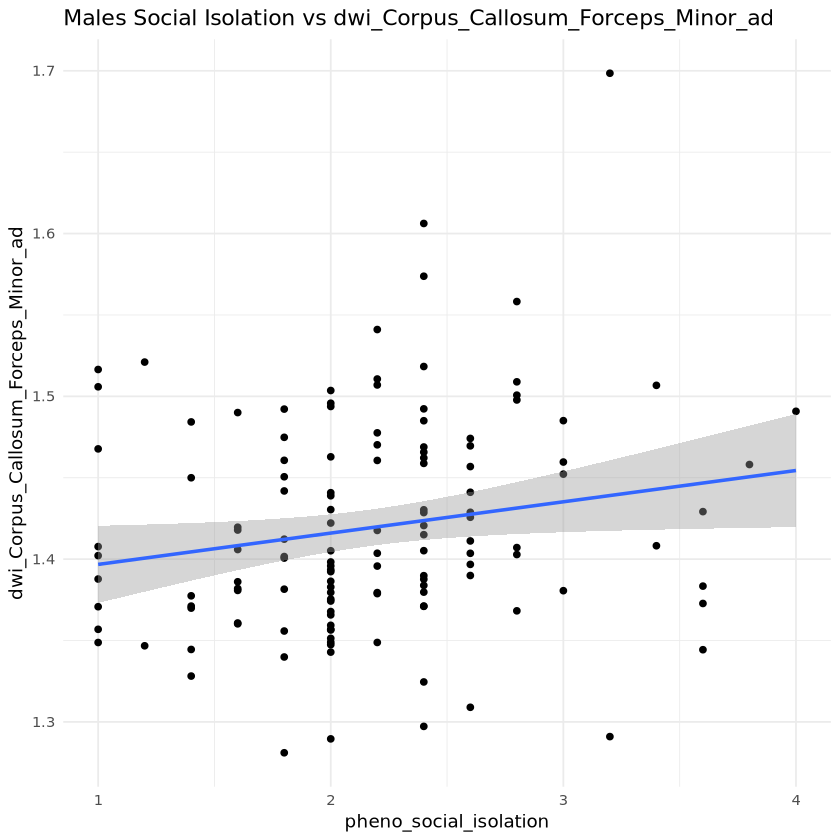

[1] "dwi_Corpus_Callosum_Forceps_Minor_md"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_md ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_md 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_md ~ pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_md 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.31156 -0.45554 -0.08356  0.40684  2.66389 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 8.184e-16  6.321e-02   0.000  1.00000    
pheno_social_isolation      1.217e-01  6.521e-02   1.867  0.06424 .  
pheno_age_at_visit          2.256e-01  7.440e-02   3.032  0.00294 ** 
dwi_neighbor_corr           1.025e-01  6.590e-02   1.555  0.12235    
dwi_white_matter_average_md 4.861e-01  7.444e-02   6.530 1.41e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**

`geom_smooth()` using formula = 'y ~ x'


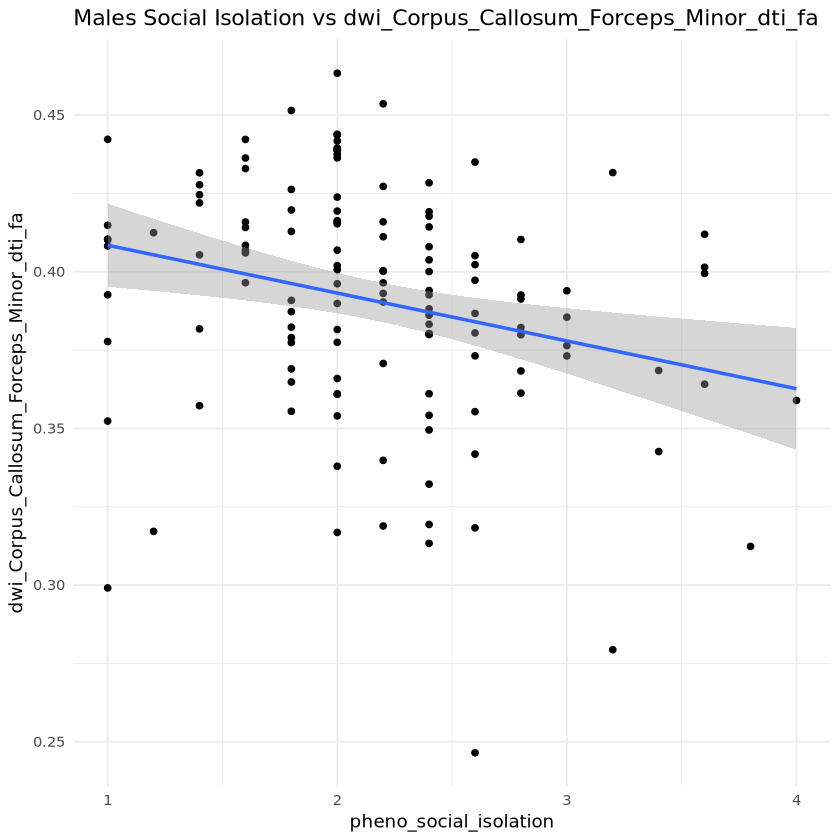

[1] "dwi_Corpus_Callosum_Forceps_Minor_qa"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_qa ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_qa 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_qa ~ pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_qa 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72601 -0.10785 -0.01828  0.14801  0.48847 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -9.263e-18  1.800e-02   0.000   1.0000    
pheno_social_isolation      -2.539e-02  1.857e-02  -1.367   0.1740    
pheno_age_at_visit          -4.819e-02  1.889e-02  -2.551   0.0119 *  
dwi_neighbor_corr           -5.898e-03  1.870e-02  -0.315   0.7530    
dwi_white_matter_average_qa  9.736e-01  1.838e-02  52.960   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.0

`geom_smooth()` using formula = 'y ~ x'


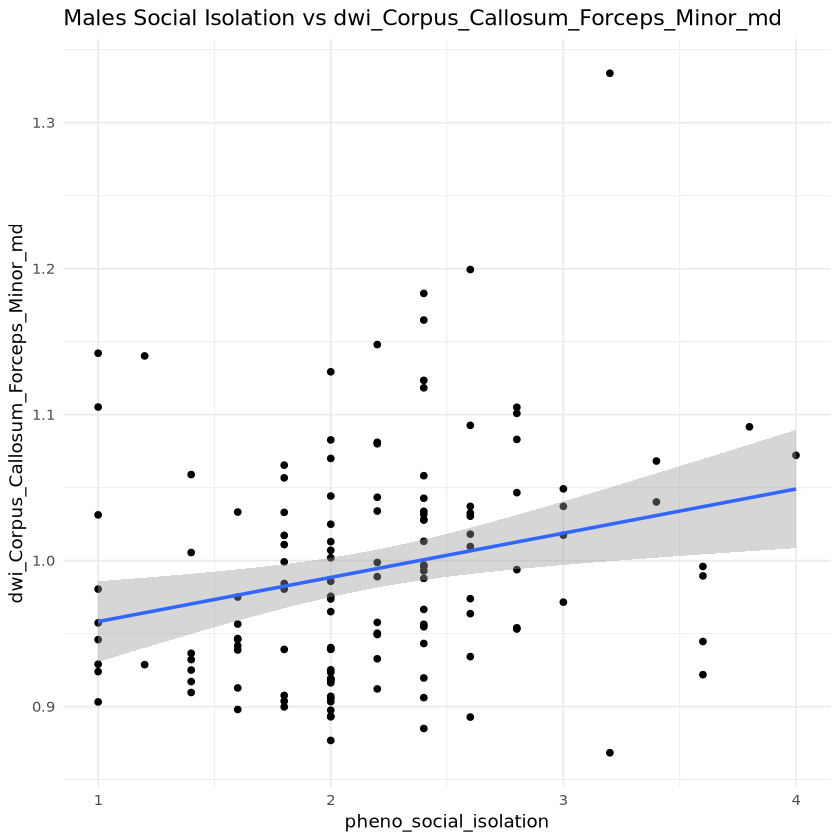

[1] "dwi_Corpus_Callosum_Forceps_Minor_rd"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_rd ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_rd 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_rd ~ pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_rd 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9177 -0.4595 -0.1151  0.3975  2.4726 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.097e-15  6.238e-02   0.000 1.000000    
pheno_social_isolation      1.283e-01  6.439e-02   1.993 0.048430 *  
pheno_age_at_visit          2.420e-01  7.184e-02   3.368 0.000999 ***
dwi_neighbor_corr           1.028e-01  6.521e-02   1.576 0.117508    
dwi_white_matter_average_rd 4.864e-01  7.207e-02   6.749 4.65e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’

`geom_smooth()` using formula = 'y ~ x'


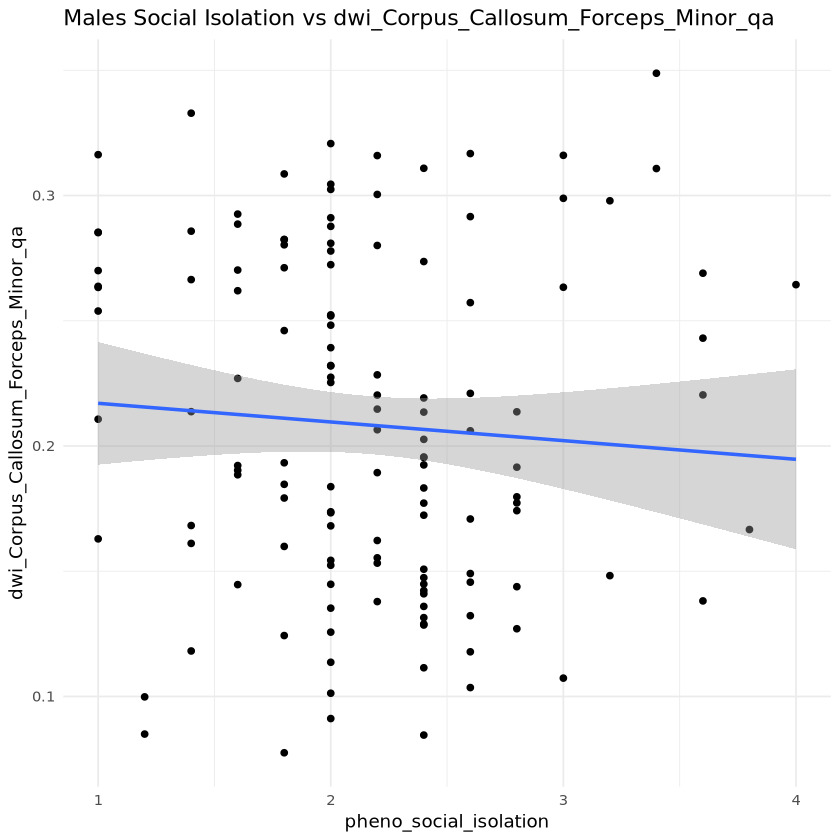

[1] "dwi_Corpus_Callosum_Forceps_Minor_mean_length_mm"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_mean_length_mm ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_mean_length_mm ~ pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.04075 -0.46944  0.00556  0.41501  2.61640 

Coefficients:
                                                           Estimate Std. Error
(Intercept)                                              -1.448e-16  7.433e-02
pheno_social_isolation                                    4.613e-02  7.681e-02
pheno_age_at_visit                                       -1.601e-01  8.050e-02
dwi_neighbor_corr                              

`geom_smooth()` using formula = 'y ~ x'


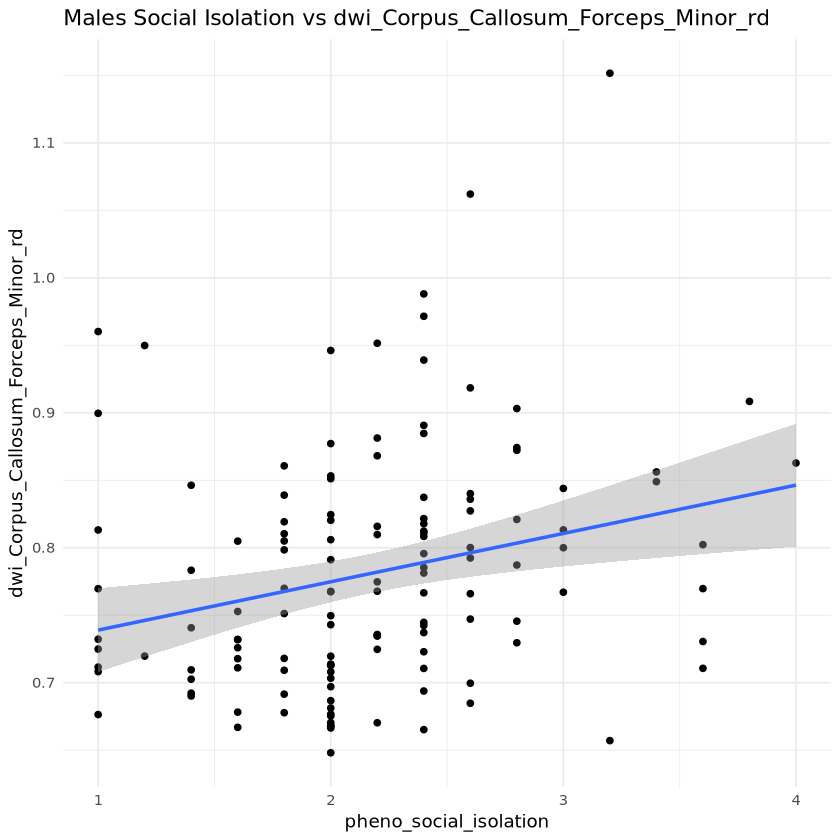

[1] "dwi_Corpus_Callosum_Forceps_Minor_span_mm"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_span_mm ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_span_mm ~ pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3763 -0.5791 -0.2378  0.3013  4.3131 

Coefficients:
                                                           Estimate Std. Error
(Intercept)                                              -6.166e-17  8.766e-02
pheno_social_isolation                                    6.972e-03  9.059e-02
pheno_age_at_visit                                        7.459e-02  9.494e-02
dwi_neighbor_corr                                        -4.214e-02  9.207e-02

`geom_smooth()` using formula = 'y ~ x'


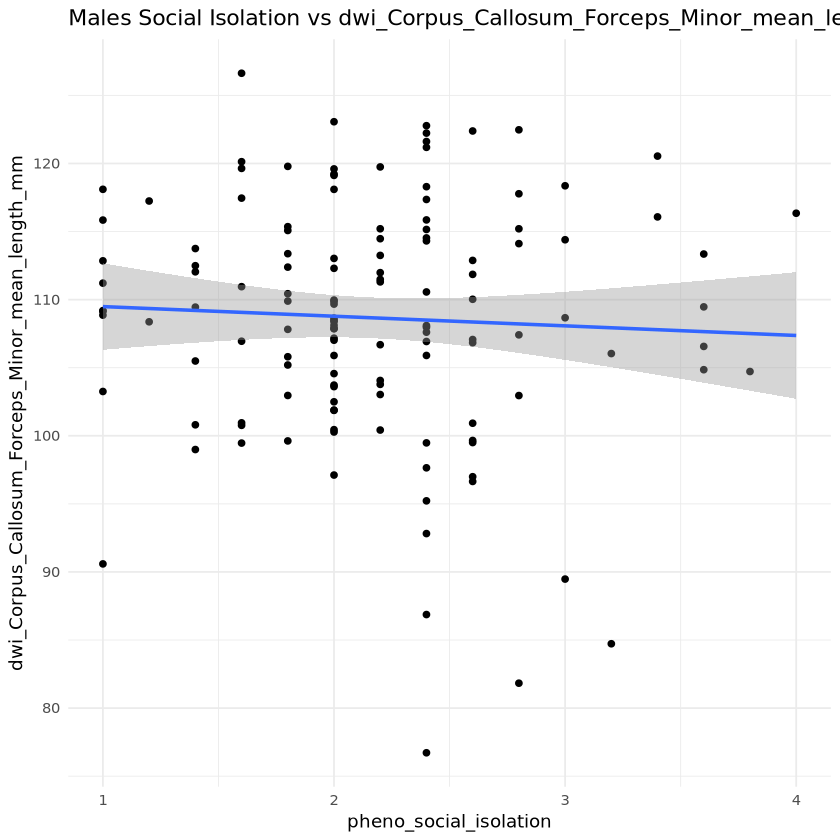

[1] "dwi_Corpus_Callosum_Forceps_Minor_curl"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_curl ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_curl ~ pheno_age_at_visit + dwi_neighbor_corr 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2080 -0.6132 -0.1129  0.4976  3.4770 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)             7.890e-16  8.668e-02   0.000    1.000
pheno_social_isolation  1.391e-02  8.937e-02   0.156    0.877
pheno_age_at_visit     -1.364e-01  9.094e-02  -1.500    0.136
dwi_neighbor_corr       1.030e-01  8.858e-02   1.163    0.247

Residual standard error: 0.9997 on 129 degrees of freedom
Multiple R-squared:  0.02338,	Adjusted R-squared:  0.0006651 
F-statistic: 1.029 on 3 and 129 DF,  p-value: 0.382


Change in Adjusted R-squared (Full v

`geom_smooth()` using formula = 'y ~ x'


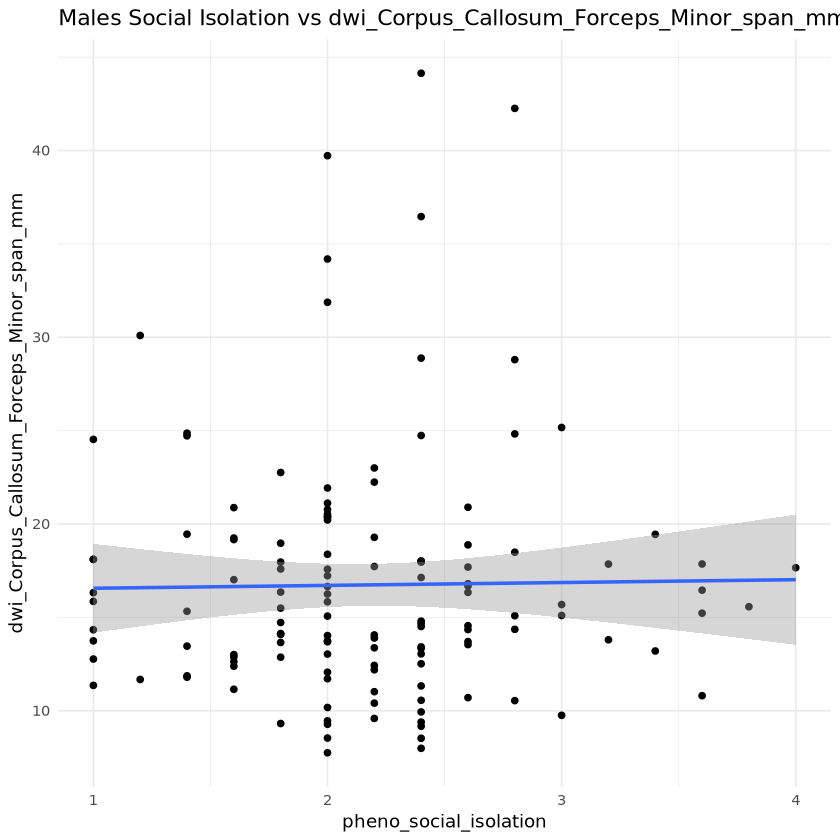

[1] "dwi_Corpus_Callosum_Forceps_Minor_elongation"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_elongation ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_elongation ~ pheno_age_at_visit + dwi_neighbor_corr 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7527 -0.6615 -0.0928  0.5684  3.7090 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)            4.172e-16  8.441e-02   0.000   1.0000  
pheno_social_isolation 9.505e-02  8.703e-02   1.092   0.2768  
pheno_age_at_visit     2.010e-01  8.856e-02   2.270   0.0249 *
dwi_neighbor_corr      9.199e-02  8.626e-02   1.066   0.2882  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9735 on 129 degrees of freedom
Multiple R-squared:  0.0739,	Adjusted R-squared:  0.05236 
F-s

`geom_smooth()` using formula = 'y ~ x'


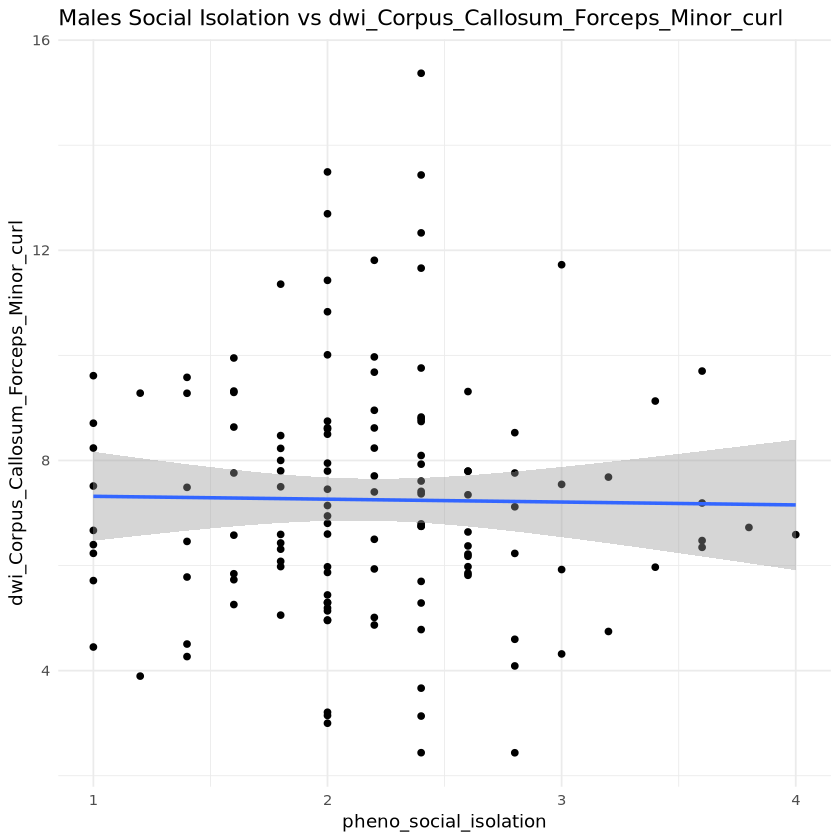

[1] "dwi_Corpus_Callosum_Forceps_Minor_diameter_mm"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_diameter_mm ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_diameter_mm ~ pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3075 -0.6341 -0.0142  0.5924  2.5660 

Coefficients:
                                                           Estimate Std. Error
(Intercept)                                              -7.687e-16  7.852e-02
pheno_social_isolation                                   -1.123e-01  8.115e-02
pheno_age_at_visit                                       -3.313e-01  8.504e-02
dwi_neighbor_corr                                        -9.203e-0

`geom_smooth()` using formula = 'y ~ x'


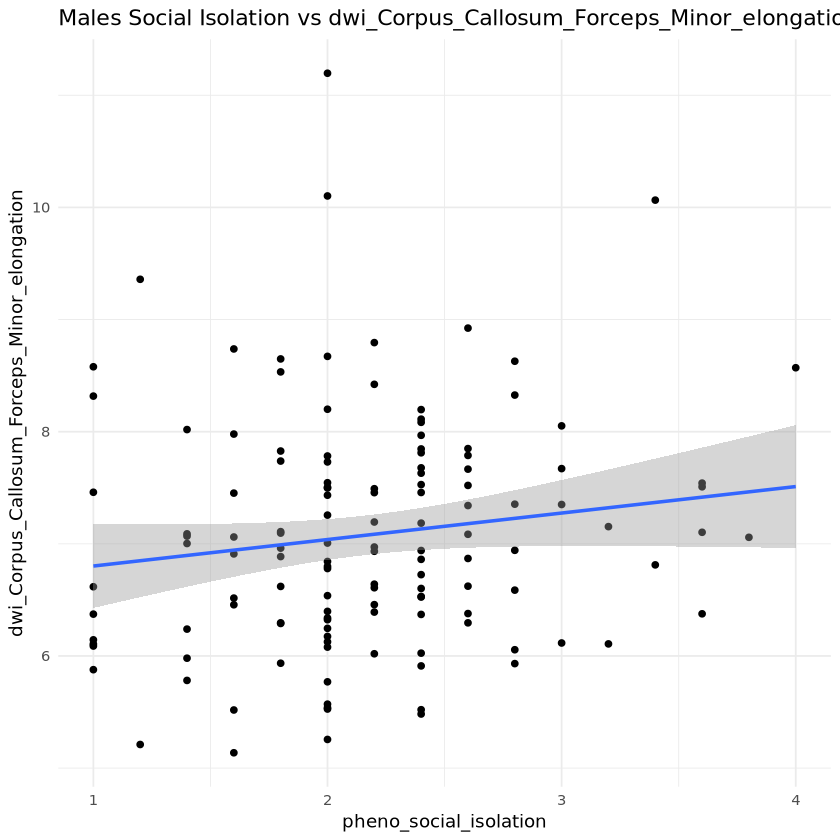

[1] "dwi_Corpus_Callosum_Forceps_Minor_volume_mm3"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_volume_mm3 ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_volume_mm3 ~ pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.67210 -0.67074 -0.02486  0.60523  3.09345 

Coefficients:
                                                           Estimate Std. Error
(Intercept)                                              -4.443e-16  7.590e-02
pheno_social_isolation                                   -9.608e-02  7.844e-02
pheno_age_at_visit                                       -3.311e-01  8.221e-02
dwi_neighbor_corr                                        -6

`geom_smooth()` using formula = 'y ~ x'


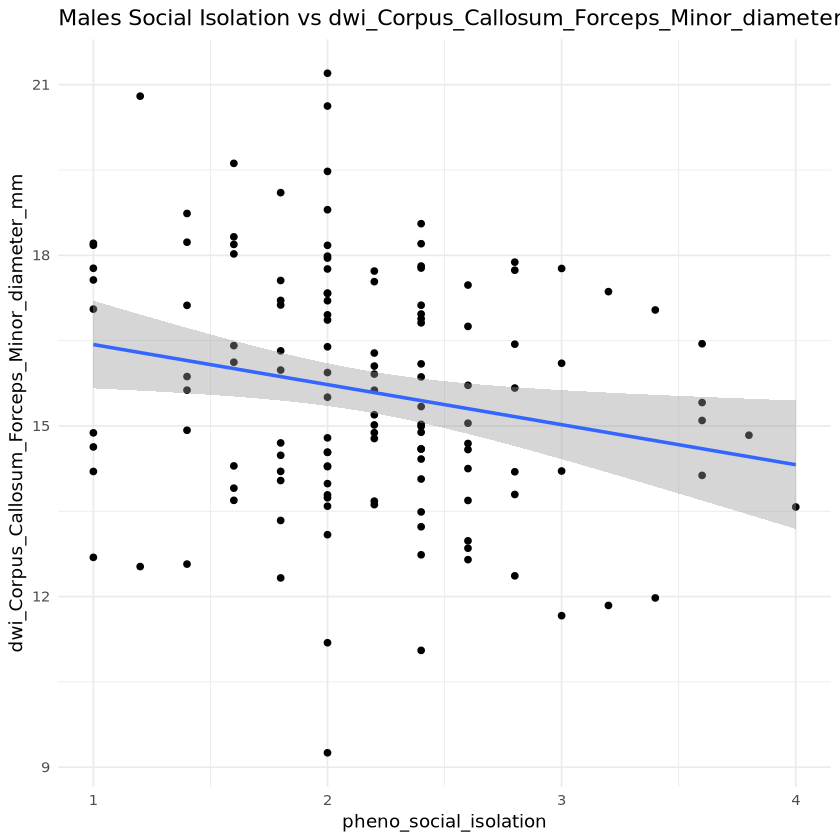

[1] "dwi_Corpus_Callosum_Forceps_Minor_trunk_volume_mm3"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_trunk_volume_mm3 ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_trunk_volume_mm3 ~ pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0289 -0.6834 -0.0942  0.4563  3.2311 

Coefficients:
                                                           Estimate Std. Error
(Intercept)                                              -1.564e-15  8.309e-02
pheno_social_isolation                                   -1.344e-01  8.587e-02
pheno_age_at_visit                                       -1.088e-01  8.999e-02
dwi_neighbor_corr                                  

`geom_smooth()` using formula = 'y ~ x'


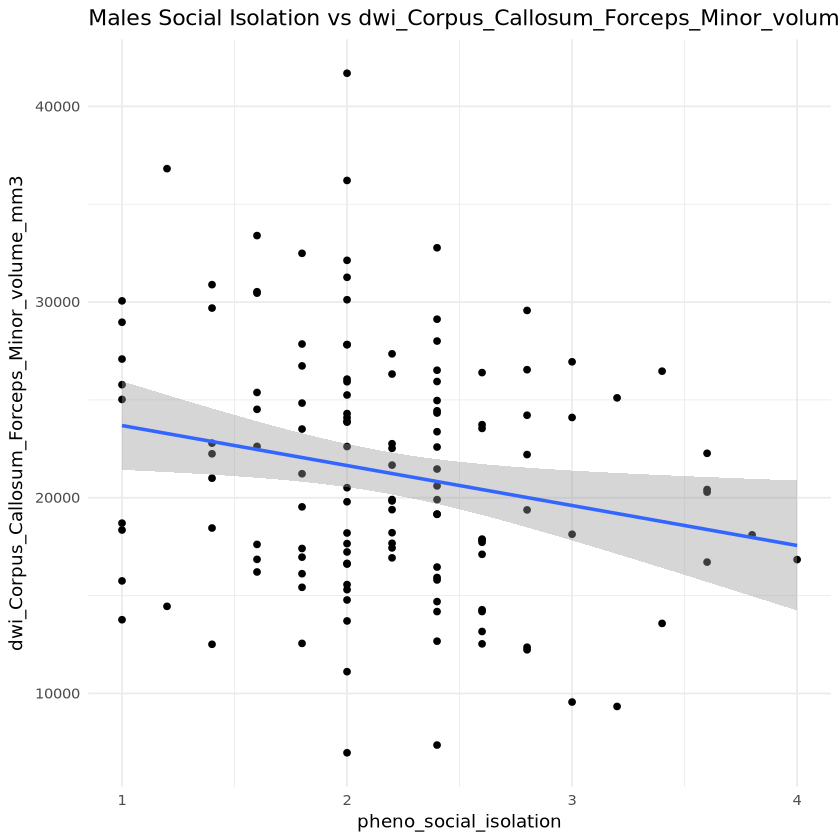

[1] "dwi_Corpus_Callosum_Forceps_Minor_branch_volume_mm3"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_branch_volume_mm3 ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_branch_volume_mm3 ~ pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8652 -0.7398 -0.1270  0.5086  3.2337 

Coefficients:
                                                           Estimate Std. Error
(Intercept)                                               1.240e-15  8.319e-02
pheno_social_isolation                                    5.988e-02  8.597e-02
pheno_age_at_visit                                       -2.583e-01  9.010e-02
dwi_neighbor_corr                               

`geom_smooth()` using formula = 'y ~ x'


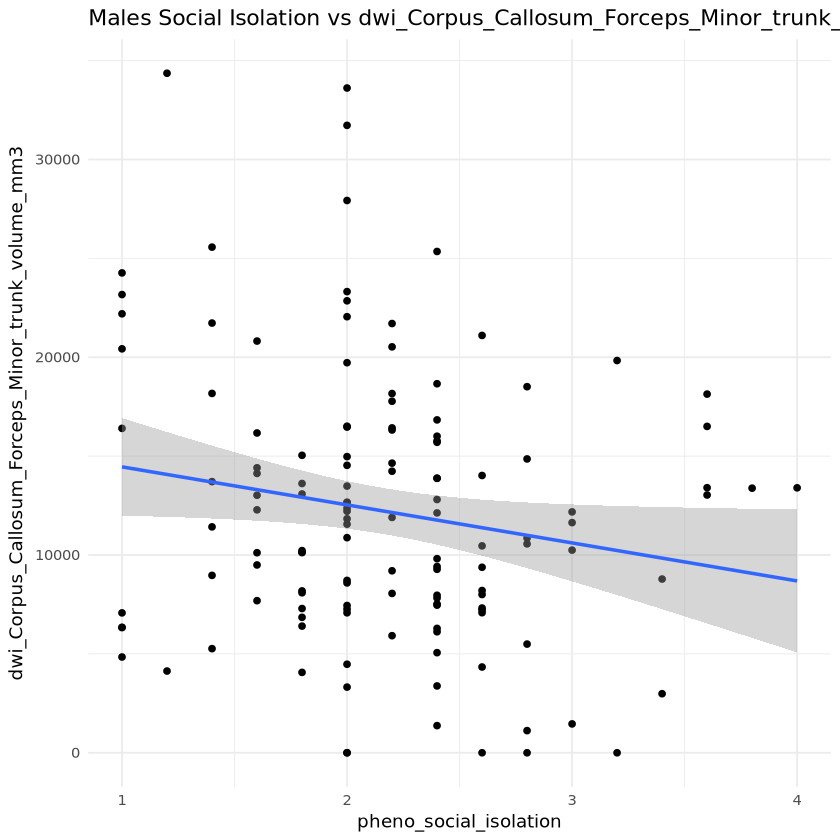

[1] "dwi_Corpus_Callosum_Forceps_Minor_total_surface_area_mm2"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_total_surface_area_mm2 ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_total_surface_area_mm2 ~ pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.96440 -0.55536 -0.05577  0.44427  2.56790 

Coefficients:
                                                           Estimate Std. Error
(Intercept)                                               8.851e-16  7.643e-02
pheno_social_isolation                                   -8.819e-02  7.899e-02
pheno_age_at_visit                                       -3.025e-01  8.279e-02
dwi_neighbor_corr      

`geom_smooth()` using formula = 'y ~ x'


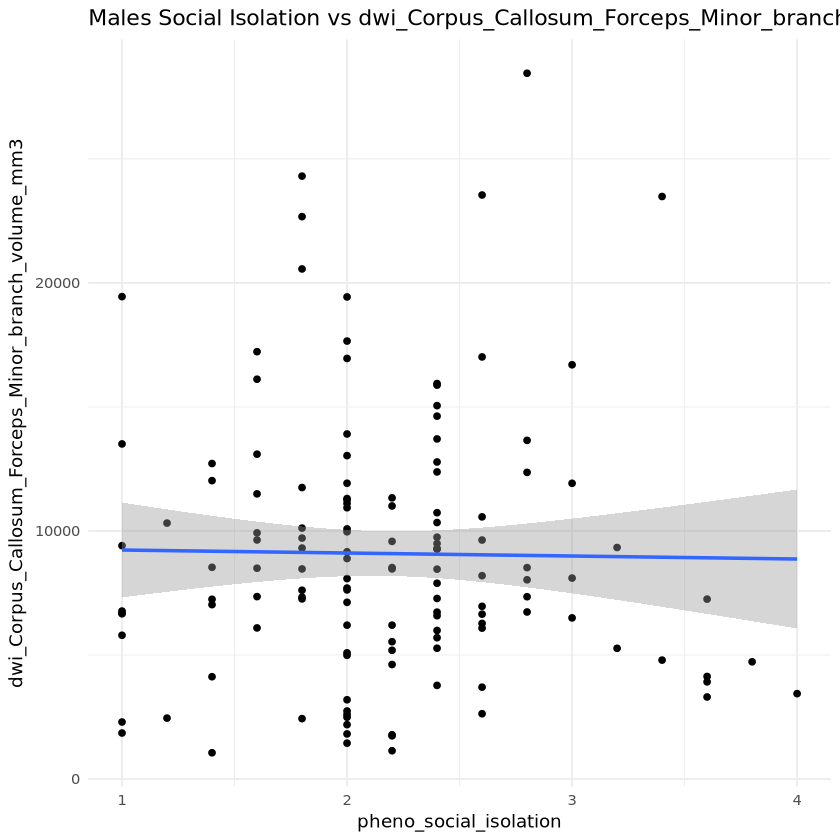

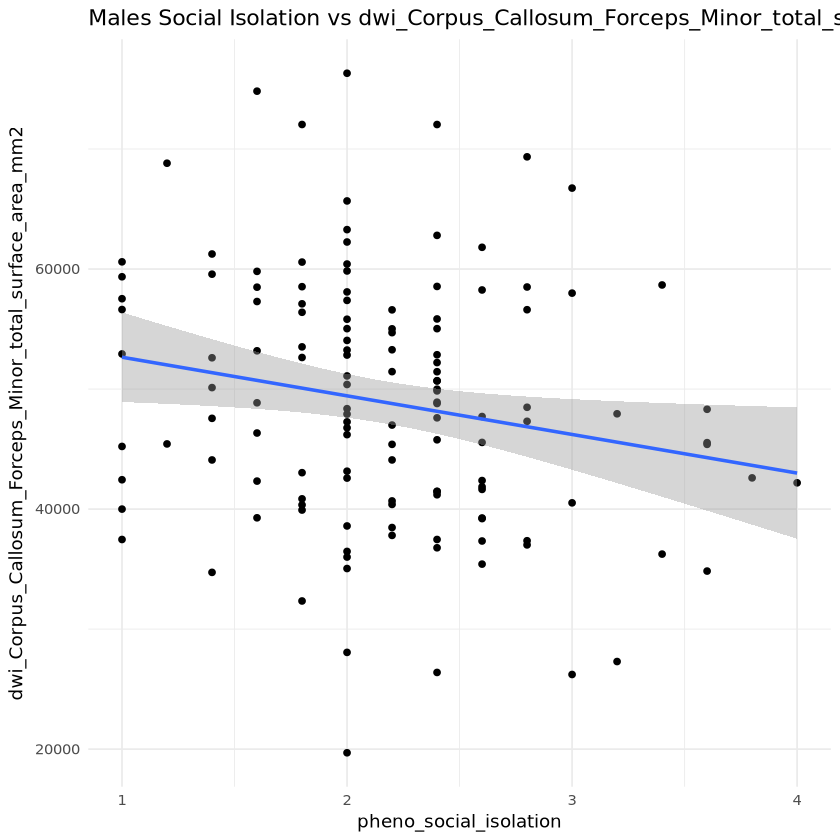

In [17]:
# Run a model
data_model <- dwi_data_male
#string_to_match <- "dwi.*AAL.*Frontal.*_dti_fa"
#string_to_match <- "dwi.*Minor.*_dti_fa"
string_to_match <- "dwi.*Minor.*"
columns_match <- names(data_model)[grep(string_to_match, colnames(data_model))]
i <- 1
p_vals <- c()
for (main_dependent in columns_match) {
    data_model <- dwi_data_male
    print(main_dependent)
    main_predictor <- "pheno_social_isolation"
    covariates_numeric <- c("pheno_age_at_visit",  "dwi_neighbor_corr")
    global_covariate <- global_covariates[i]  # Using global_covariates[i] based on the current i value
    if (global_covariate != "") {
        covariates_numeric <- c(covariates_numeric, global_covariate)
    }
    
    # Subset relevant columns and filter
    data_model <- na.omit(dwi_data_male[c(main_predictor, main_dependent, covariates_numeric, covariates_factor)])
    covariates_factor <- NULL
    #data_model <- subset(data_model, get(main_dependent) <= 2.5)
    
    # Run the OLS model for the current dependent variable
    model_result <- run_ols_model(dataframe = data_model,
                                  main_dependent = main_dependent,
                                  main_predictor = main_predictor,
                                  covariates_numeric = covariates_numeric,
                                  covariates_factor = covariates_factor)
    
    # Directly plot the main dependent variable vs. the main predictor
    formatted_string <- sprintf("Males Social Isolation vs %s", main_dependent)
    plot <- ggplot(data_model, aes(x = !!sym(main_predictor), y = !!sym(main_dependent))) +
      geom_point() + # Add points
      geom_smooth(method = "lm", se = TRUE) + # Add linear model fit line with confidence interval
      labs(title = formatted_string,
           x = main_predictor,
           y = main_dependent) +
      theme_minimal() # Optional: for a minimal theme
    
    # Print the plot immediately after the OLS output
    print(plot)
    
    # Increment the counter for global covariates (used in the next iteration)
    i <- i + 1
}

#### Females

[1] "dwi_Corpus_Callosum_Forceps_Minor_ad"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_ad ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_ad 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_ad ~ pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_ad 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7204 -0.5109 -0.0410  0.4645  3.2546 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -1.057e-15  3.945e-02   0.000 1.000000    
pheno_social_isolation      -1.665e-02  4.026e-02  -0.414 0.679430    
pheno_age_at_visit          -4.777e-03  5.041e-02  -0.095 0.924539    
dwi_neighbor_corr            1.493e-01  3.982e-02   3.749 0.000202 ***
dwi_white_matter_average_ad  5.635e-01  4.985e-02  11.305  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.

`geom_smooth()` using formula = 'y ~ x'


[1] "dwi_Corpus_Callosum_Forceps_Minor_dti_fa"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_dti_fa ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_dti_fa 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_dti_fa ~ pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_dti_fa 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.24156 -0.34350  0.08104  0.44964  1.33117 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -4.072e-16  3.215e-02   0.000    1.000    
pheno_social_isolation          -5.343e-03  3.280e-02  -0.163    0.871    
pheno_age_at_visit              -1.812e-01  3.588e-02  -5.050 6.60e-07 ***
dwi_neighbor_corr               -1.308e-01  3.264e-02  -4.008 7.23e-05 ***
dwi_white_matter_average_dti_fa  6.285e-01  3.577e-02  17.571 

`geom_smooth()` using formula = 'y ~ x'


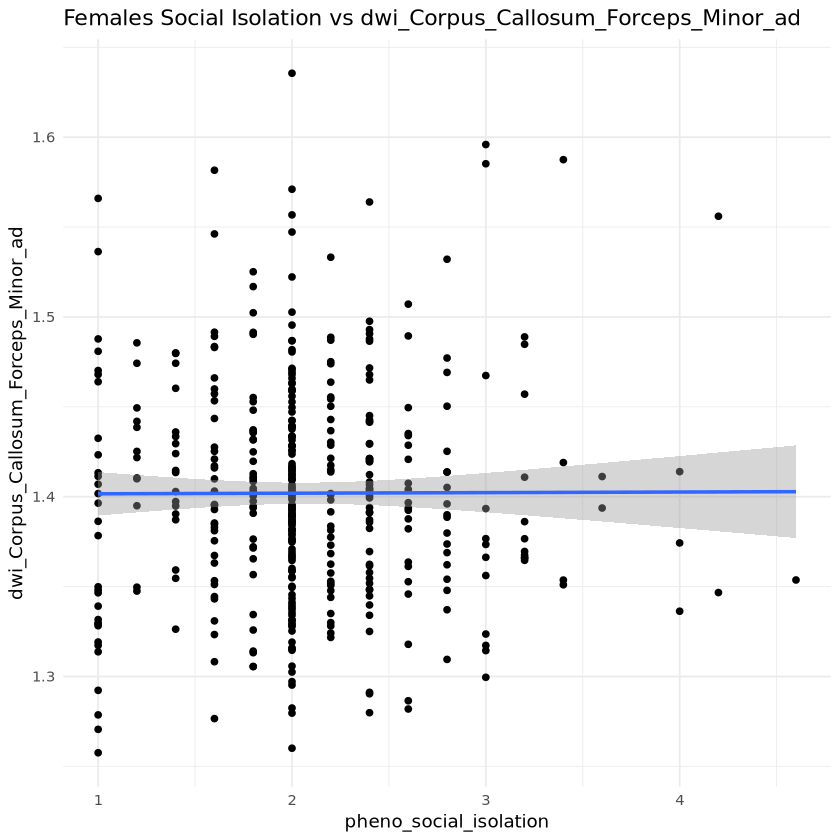

[1] "dwi_Corpus_Callosum_Forceps_Minor_md"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_md ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_md 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_md ~ pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_md 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8650 -0.4691 -0.0857  0.4001  3.2735 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  1.082e-15  3.393e-02   0.000    1.000    
pheno_social_isolation      -4.119e-03  3.461e-02  -0.119    0.905    
pheno_age_at_visit           3.236e-02  4.276e-02   0.757    0.450    
dwi_neighbor_corr            1.649e-01  3.430e-02   4.809 2.12e-06 ***
dwi_white_matter_average_md  6.658e-01  4.243e-02  15.691  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.

`geom_smooth()` using formula = 'y ~ x'


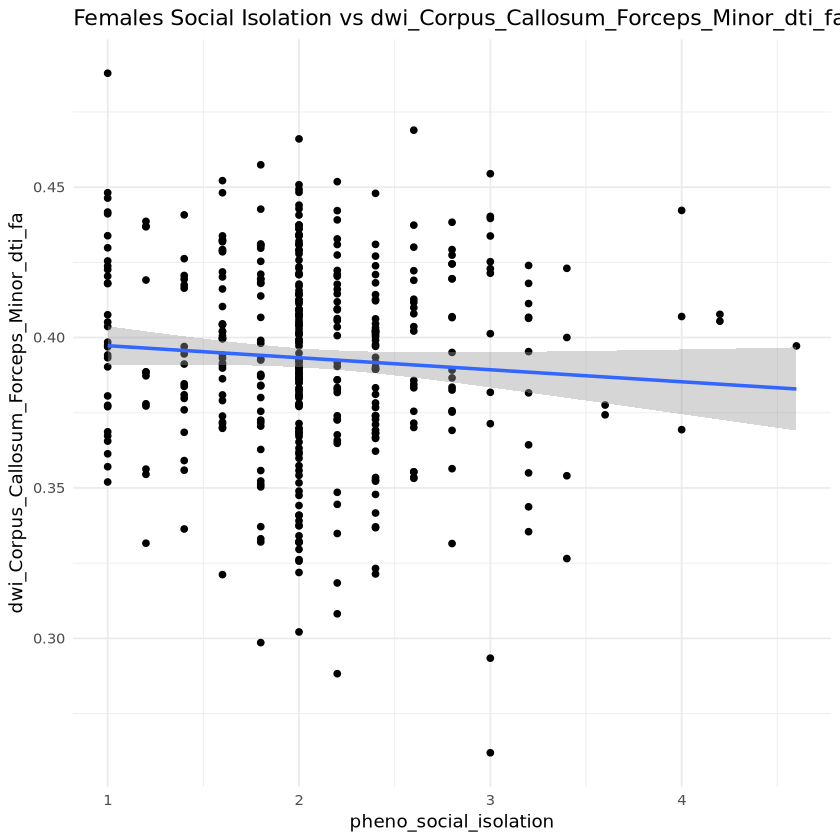

[1] "dwi_Corpus_Callosum_Forceps_Minor_qa"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_qa ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_qa 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_qa ~ pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_qa 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73661 -0.11101  0.01608  0.12270  0.73165 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -3.473e-16  1.037e-02   0.000  1.00000    
pheno_social_isolation       2.107e-03  1.057e-02   0.199  0.84212    
pheno_age_at_visit          -3.295e-02  1.077e-02  -3.059  0.00236 ** 
dwi_neighbor_corr           -1.531e-02  1.047e-02  -1.461  0.14463    
dwi_white_matter_average_qa  9.828e-01  1.062e-02  92.511  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.0

`geom_smooth()` using formula = 'y ~ x'


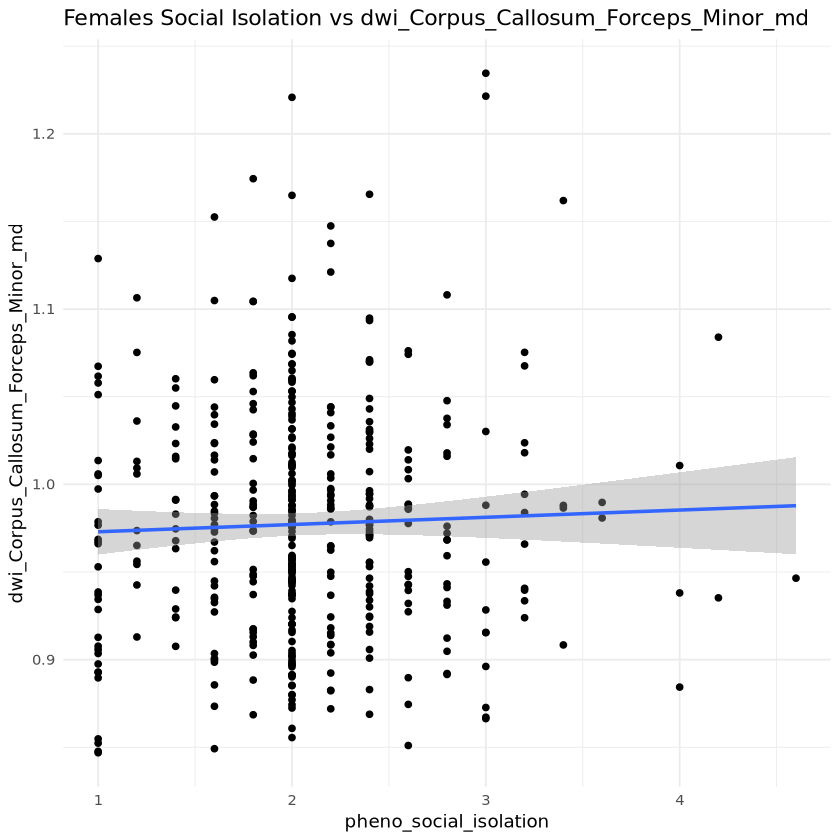

[1] "dwi_Corpus_Callosum_Forceps_Minor_rd"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_rd ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_rd 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_rd ~ pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_rd 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6010 -0.4813 -0.1015  0.4262  3.1286 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -5.204e-16  3.278e-02   0.000    1.000    
pheno_social_isolation      -1.989e-04  3.343e-02  -0.006    0.995    
pheno_age_at_visit           5.584e-02  4.060e-02   1.375    0.170    
dwi_neighbor_corr            1.610e-01  3.318e-02   4.853 1.72e-06 ***
dwi_white_matter_average_rd  6.737e-01  4.036e-02  16.693  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.

`geom_smooth()` using formula = 'y ~ x'


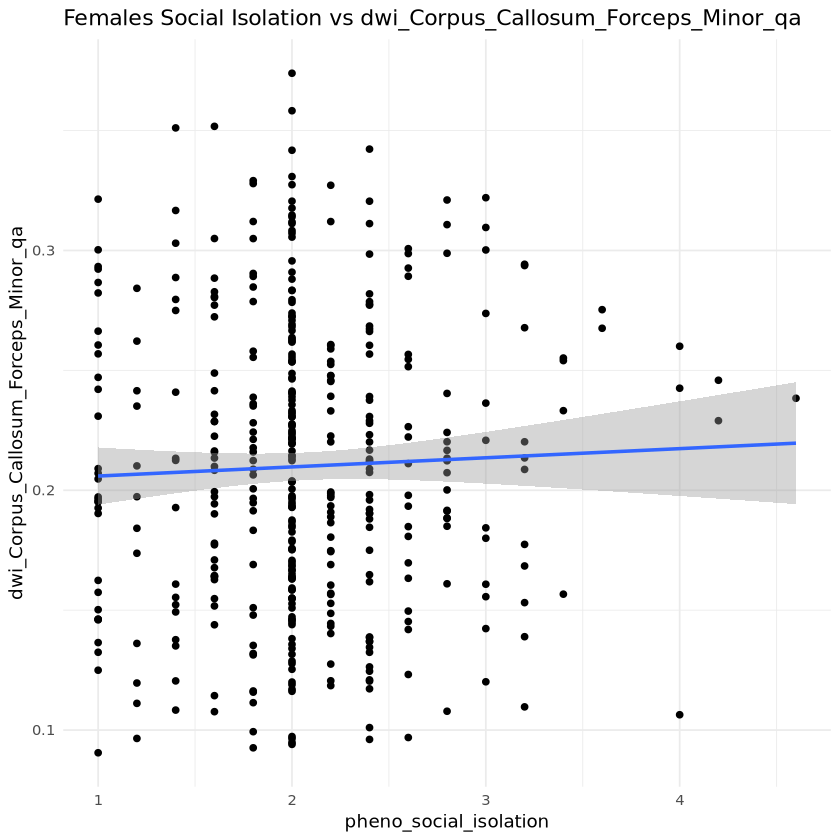

[1] "dwi_Corpus_Callosum_Forceps_Minor_mean_length_mm"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_mean_length_mm ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_mean_length_mm ~ pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2438 -0.5742 -0.0465  0.6134  2.9006 

Coefficients:
                                                           Estimate Std. Error
(Intercept)                                              -1.776e-16  4.379e-02
pheno_social_isolation                                   -1.050e-02  4.467e-02
pheno_age_at_visit                                       -9.604e-02  4.542e-02
dwi_neighbor_corr                                        

`geom_smooth()` using formula = 'y ~ x'


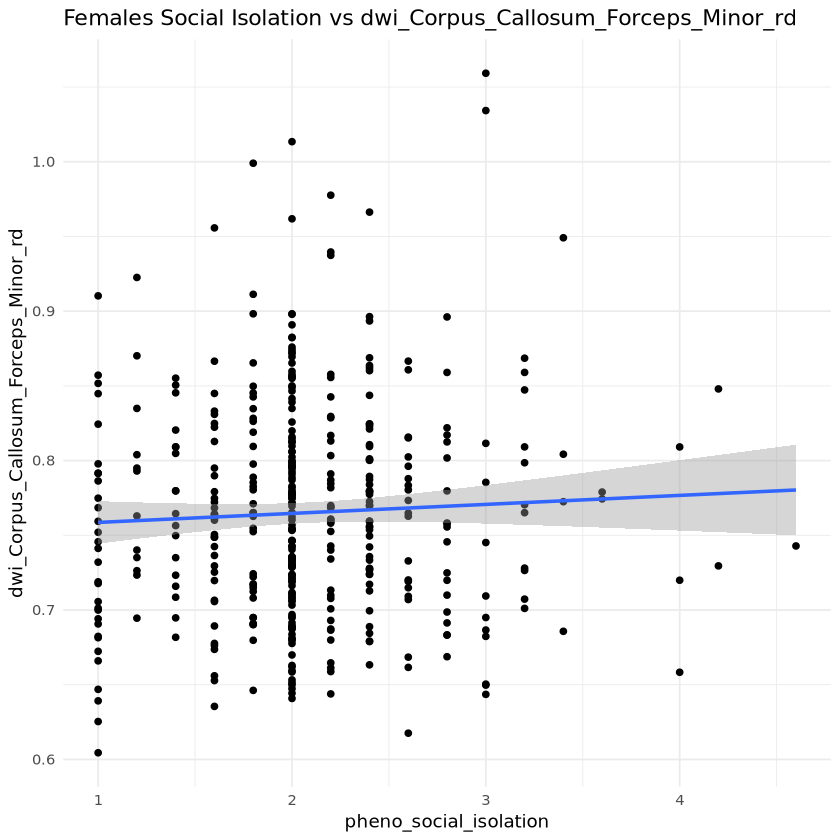

[1] "dwi_Corpus_Callosum_Forceps_Minor_span_mm"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_span_mm ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_span_mm ~ pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4099 -0.6033 -0.2062  0.2664  6.0854 

Coefficients:
                                                           Estimate Std. Error
(Intercept)                                               6.261e-18  4.858e-02
pheno_social_isolation                                    5.159e-02  4.956e-02
pheno_age_at_visit                                       -3.134e-02  5.039e-02
dwi_neighbor_corr                                         5.971e-02  4.965e-02

`geom_smooth()` using formula = 'y ~ x'


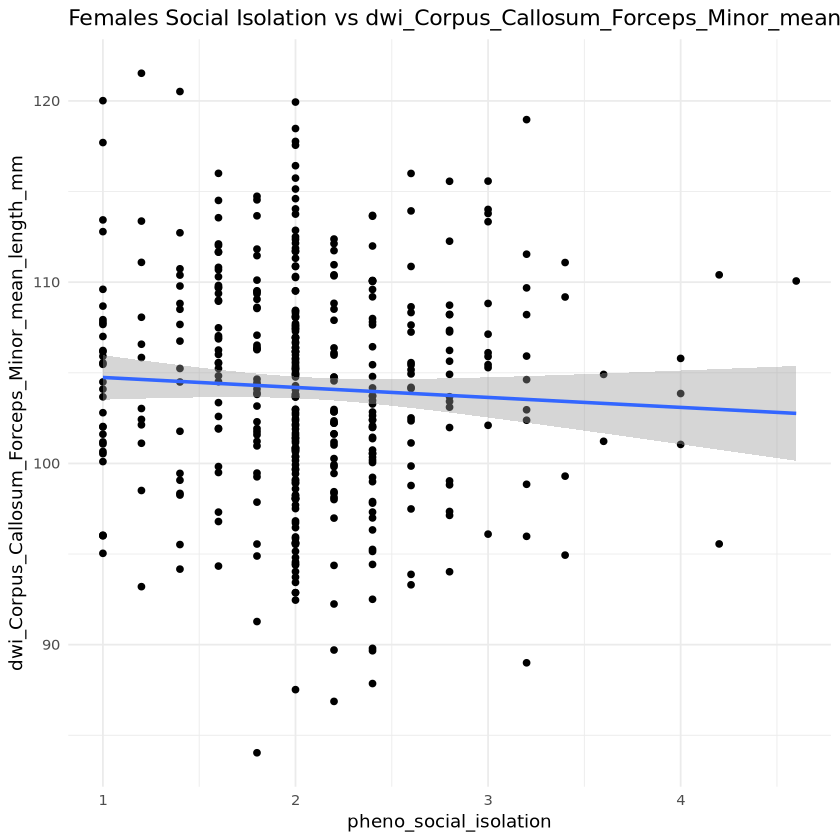

[1] "dwi_Corpus_Callosum_Forceps_Minor_curl"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_curl ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_curl ~ pheno_age_at_visit + dwi_neighbor_corr 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.37161 -0.64993 -0.09239  0.63983  3.13931 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)            -2.186e-16  4.864e-02   0.000    1.000
pheno_social_isolation  9.869e-03  4.960e-02   0.199    0.842
pheno_age_at_visit      6.969e-03  4.943e-02   0.141    0.888
dwi_neighbor_corr      -3.880e-02  4.909e-02  -0.790    0.430

Residual standard error: 1.003 on 421 degrees of freedom
Multiple R-squared:  0.00172,	Adjusted R-squared:  -0.005394 
F-statistic: 0.2417 on 3 and 421 DF,  p-value: 0.8672


Change in Adjusted R-squa

`geom_smooth()` using formula = 'y ~ x'


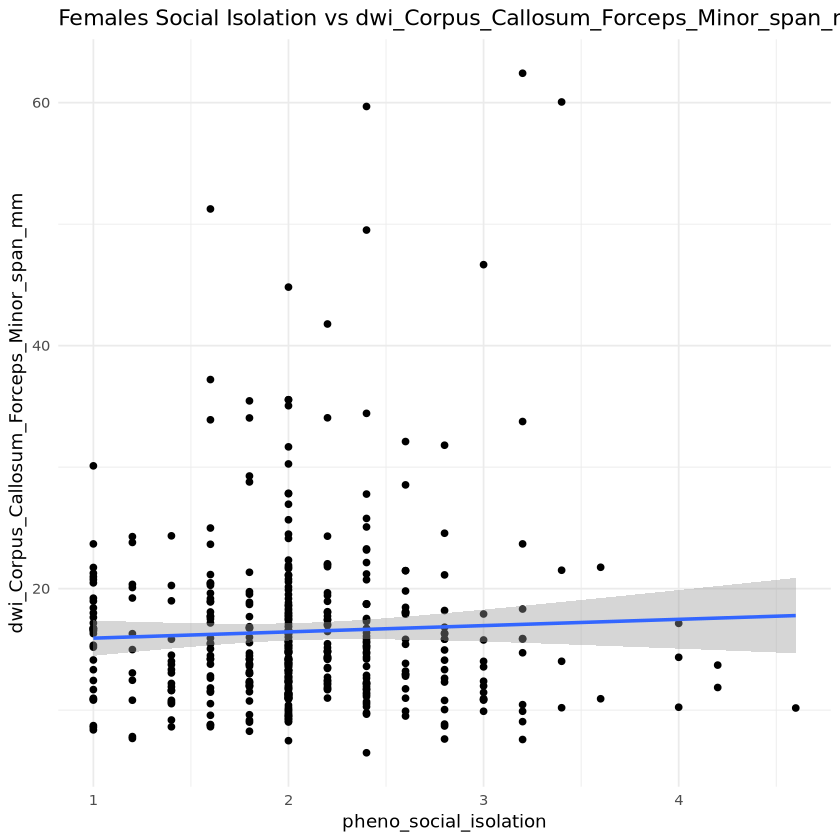

[1] "dwi_Corpus_Callosum_Forceps_Minor_elongation"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_elongation ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_elongation ~ pheno_age_at_visit + dwi_neighbor_corr 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1679 -0.6568 -0.1222  0.5797  3.5747 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -2.786e-16  4.608e-02   0.000    1.000    
pheno_social_isolation  6.837e-02  4.699e-02   1.455    0.146    
pheno_age_at_visit      3.045e-01  4.682e-02   6.503 2.23e-10 ***
dwi_neighbor_corr      -2.977e-02  4.650e-02  -0.640    0.522    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9499 on 421 degrees of freedom
Multiple R-squared:  0.1041,	Adjusted R-squared

`geom_smooth()` using formula = 'y ~ x'


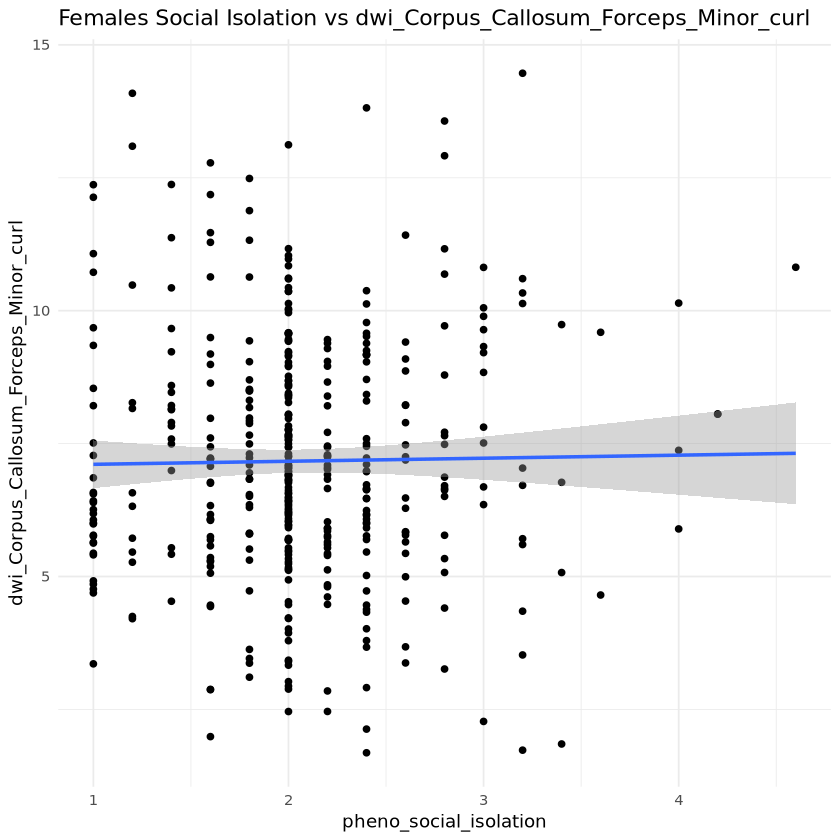

[1] "dwi_Corpus_Callosum_Forceps_Minor_diameter_mm"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_diameter_mm ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_diameter_mm ~ pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.81470 -0.60097  0.04029  0.64563  2.72963 

Coefficients:
                                                           Estimate Std. Error
(Intercept)                                               6.568e-16  4.410e-02
pheno_social_isolation                                   -7.253e-02  4.499e-02
pheno_age_at_visit                                       -4.057e-01  4.574e-02
dwi_neighbor_corr                                       

`geom_smooth()` using formula = 'y ~ x'


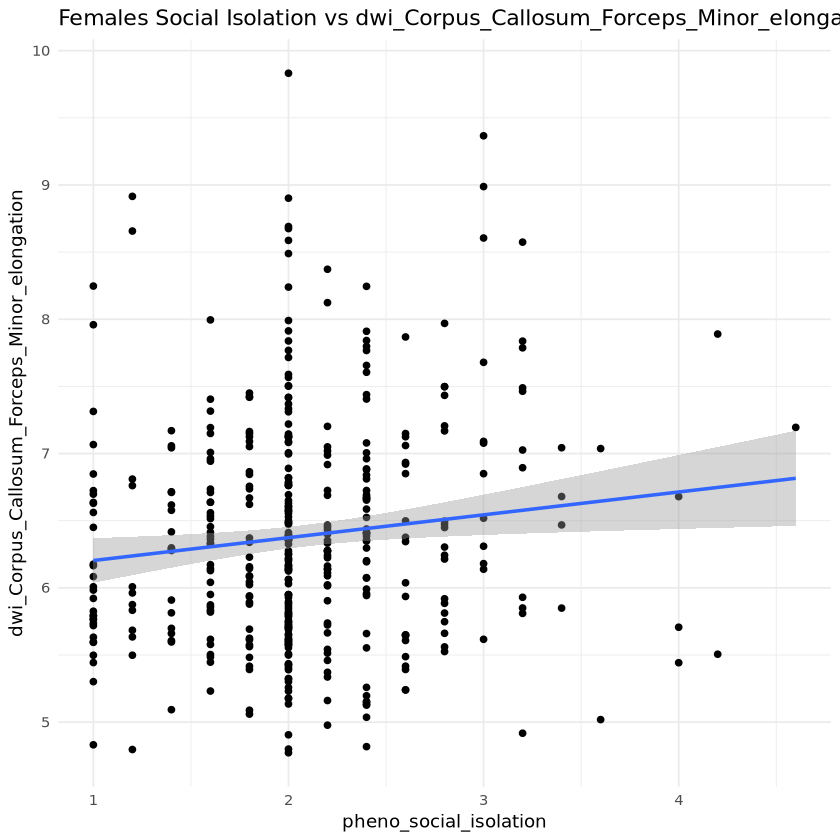

[1] "dwi_Corpus_Callosum_Forceps_Minor_volume_mm3"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_volume_mm3 ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_volume_mm3 ~ pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.37946 -0.61385  0.01174  0.57085  2.79546 

Coefficients:
                                                           Estimate Std. Error
(Intercept)                                               1.888e-16  4.344e-02
pheno_social_isolation                                   -7.218e-02  4.431e-02
pheno_age_at_visit                                       -3.967e-01  4.506e-02
dwi_neighbor_corr                                         6

`geom_smooth()` using formula = 'y ~ x'


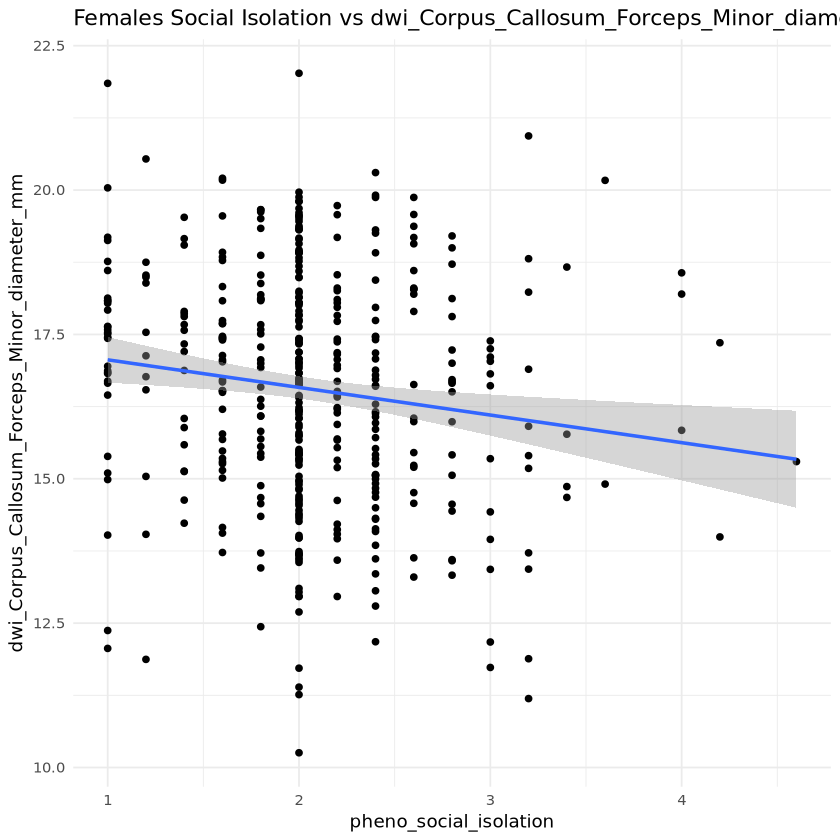

[1] "dwi_Corpus_Callosum_Forceps_Minor_trunk_volume_mm3"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_trunk_volume_mm3 ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_trunk_volume_mm3 ~ pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.60000 -0.64454 -0.05136  0.61457  2.66037 

Coefficients:
                                                           Estimate Std. Error
(Intercept)                                              -6.834e-17  4.629e-02
pheno_social_isolation                                   -1.163e-02  4.722e-02
pheno_age_at_visit                                       -3.148e-01  4.801e-02
dwi_neighbor_corr                        

`geom_smooth()` using formula = 'y ~ x'


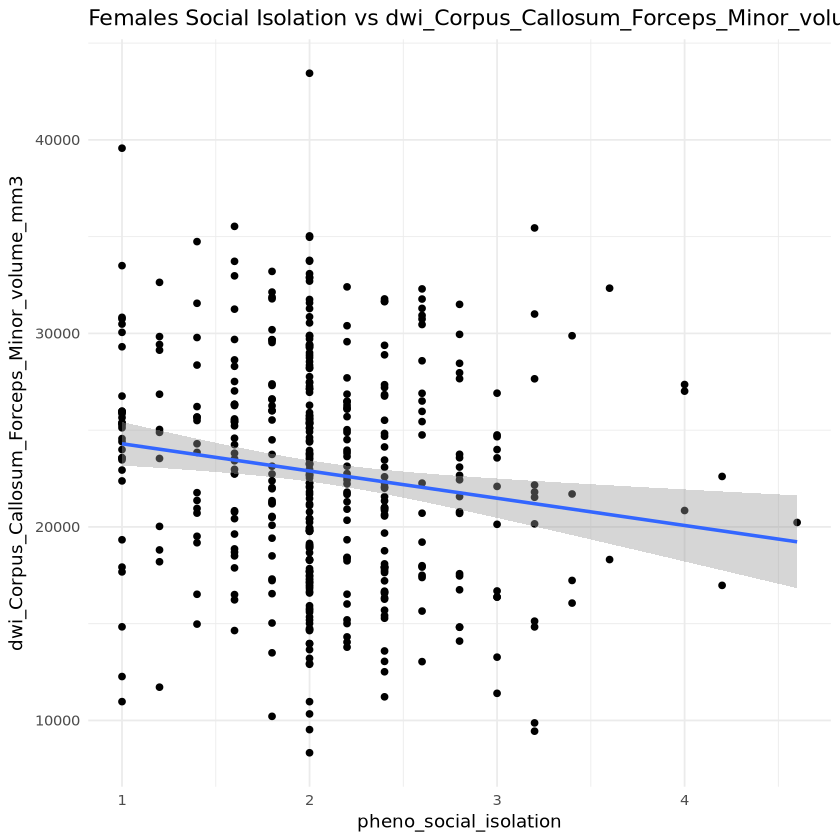

[1] "dwi_Corpus_Callosum_Forceps_Minor_branch_volume_mm3"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_branch_volume_mm3 ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_branch_volume_mm3 ~ pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6882 -0.6627 -0.1932  0.4743  4.5695 

Coefficients:
                                                           Estimate Std. Error
(Intercept)                                               1.155e-16  4.755e-02
pheno_social_isolation                                   -6.815e-02  4.851e-02
pheno_age_at_visit                                       -8.891e-02  4.932e-02
dwi_neighbor_corr                               

`geom_smooth()` using formula = 'y ~ x'


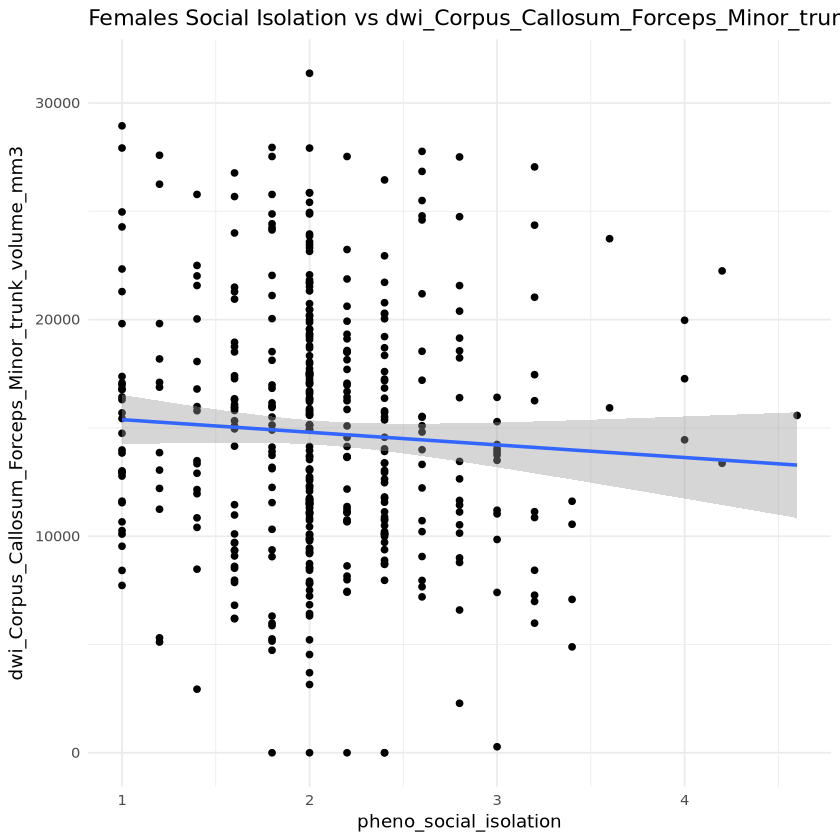

[1] "dwi_Corpus_Callosum_Forceps_Minor_total_surface_area_mm2"
Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_total_surface_area_mm2 ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_total_surface_area_mm2 ~ pheno_age_at_visit + dwi_neighbor_corr + brainmeasures_CerebralWhiteMatter_CerebralWhiteMatterVol 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.44095 -0.64065 -0.00731  0.63740  2.74503 

Coefficients:
                                                           Estimate Std. Error
(Intercept)                                               2.129e-16  4.403e-02
pheno_social_isolation                                   -8.497e-02  4.492e-02
pheno_age_at_visit                                       -3.127e-01  4.567e-02
dwi_neighbor_corr      

`geom_smooth()` using formula = 'y ~ x'


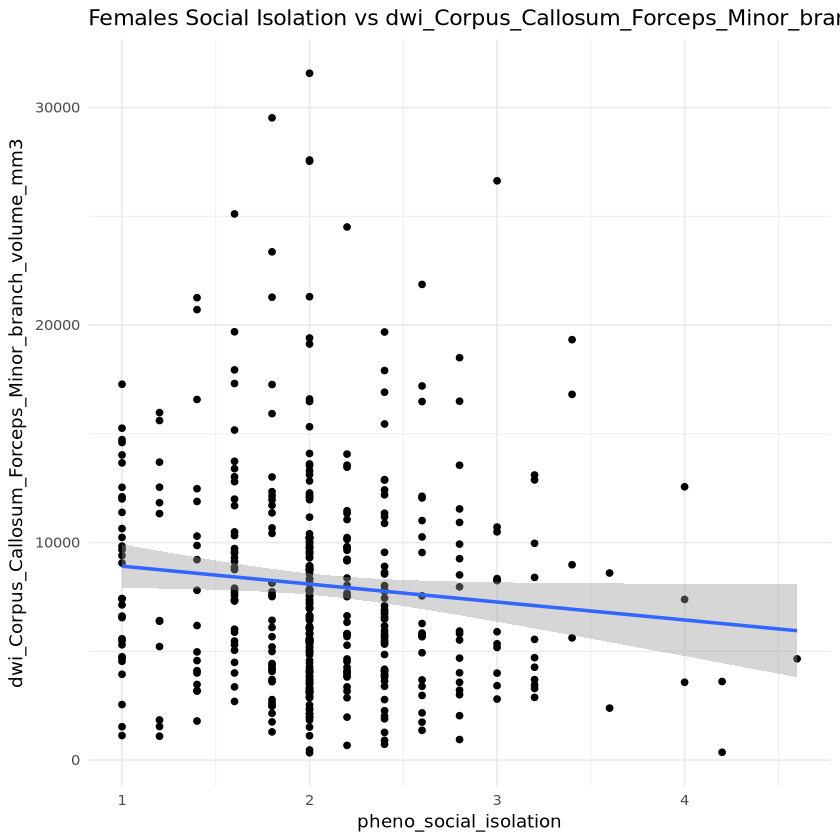

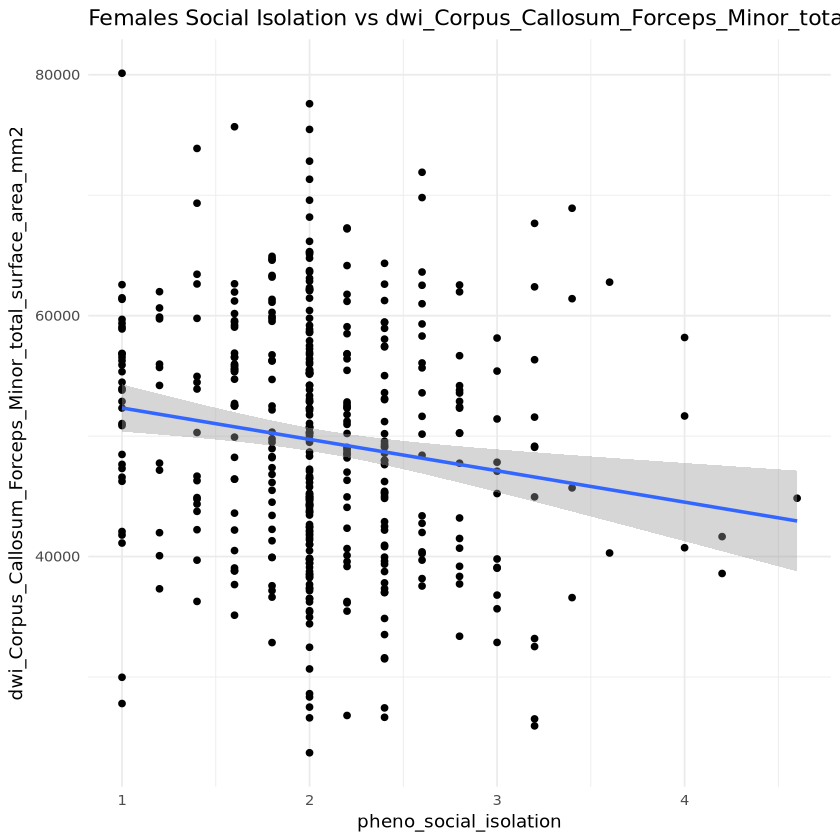

In [18]:
# Run a model
data_model <- dwi_data_female
#string_to_match <- "dwi.*AAL.*Frontal.*_dti_fa"
#string_to_match <- "dwi.*Minor.*_dti_fa"
string_to_match <- "dwi.*Minor.*"
columns_match <- names(data_model)[grep(string_to_match, colnames(data_model))]
i <- 1
p_vals <- c()
for (main_dependent in columns_match) {
    data_model <- dwi_data_female
    print(main_dependent)
    main_predictor <- "pheno_social_isolation"
    covariates_numeric <- c("pheno_age_at_visit",  "dwi_neighbor_corr")
    global_covariate <- global_covariates[i]  # Using global_covariates[i] based on the current i value
    if (global_covariate != "") {
        covariates_numeric <- c(covariates_numeric, global_covariate)
    }
    
    # Subset relevant columns and filter
    data_model <- na.omit(dwi_data_female[c(main_predictor, main_dependent, covariates_numeric, covariates_factor)])
    covariates_factor <- NULL
    #data_model <- subset(data_model, get(main_dependent) <= 2.5)
    
    # Run the OLS model for the current dependent variable
    model_result <- run_ols_model(dataframe = data_model,
                                  main_dependent = main_dependent,
                                  main_predictor = main_predictor,
                                  covariates_numeric = covariates_numeric,
                                  covariates_factor = covariates_factor)
    
    # Directly plot the main dependent variable vs. the main predictor
    formatted_string <- sprintf("Females Social Isolation vs %s", main_dependent)
    plot <- ggplot(data_model, aes(x = !!sym(main_predictor), y = !!sym(main_dependent))) +
      geom_point() + # Add points
      geom_smooth(method = "lm", se = TRUE) + # Add linear model fit line with confidence interval
      labs(title = formatted_string,
           x = main_predictor,
           y = main_dependent) +
      theme_minimal() # Optional: for a minimal theme
    
    # Print the plot immediately after the OLS output
    print(plot)
    
    # Increment the counter for global covariates (used in the next iteration)
    i <- i + 1
}

### Anat

#### Wholebrain

##### Males

In [40]:
# Run a model
data_model <- anat_data_male

main_predictor <- "pheno_social_isolation"
covariates_numeric <- c("pheno_age_at_visit")
covariates_factor <- NULL
main_dependent <- "brainmeasures_EstimatedTotalIntraCranialVol_eTIV"
model <- run_ols_model(dataframe=data_model,
              main_dependent = main_dependent,
              main_predictor = main_predictor,
              covariates_numeric = covariates_numeric,
              covariates_factor = covariates_factor)

Formula (Full Model): brainmeasures_EstimatedTotalIntraCranialVol_eTIV ~ pheno_social_isolation + pheno_age_at_visit 

Formula (Reduced Model): brainmeasures_EstimatedTotalIntraCranialVol_eTIV ~ pheno_age_at_visit 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.76284 -0.62325 -0.01465  0.72246  2.76749 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)            6.199e-16  9.789e-02   0.000    1.000
pheno_social_isolation 3.454e-04  1.001e-01   0.003    0.997
pheno_age_at_visit     1.147e-01  1.001e-01   1.145    0.255

Residual standard error: 1.003 on 102 degrees of freedom
Multiple R-squared:  0.01317,	Adjusted R-squared:  -0.00618 
F-statistic: 0.6806 on 2 and 102 DF,  p-value: 0.5086


Change in Adjusted R-squared (Full vs Reduced Model): -0.009768619 



##### Females

In [20]:
# Run a model
data_model <- anat_data_female

main_predictor <- "pheno_social_isolation"
covariates_numeric <- c("pheno_age_at_visit")
covariates_factor <- NULL
main_dependent <- "brainmeasures_EstimatedTotalIntraCranialVol_eTIV"
model <- run_ols_model(dataframe=data_model,
              main_dependent = main_dependent,
              main_predictor = main_predictor,
              covariates_numeric = covariates_numeric,
              covariates_factor = covariates_factor)

Formula (Full Model): brainmeasures_EstimatedTotalIntraCranialVol_eTIV ~ pheno_social_isolation + pheno_age_at_visit 

Formula (Reduced Model): brainmeasures_EstimatedTotalIntraCranialVol_eTIV ~ pheno_age_at_visit 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8481 -0.6078  0.0155  0.6319  3.0259 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)   
(Intercept)            -4.919e-16  4.968e-02   0.000  1.00000   
pheno_social_isolation  4.914e-02  5.044e-02   0.974  0.33050   
pheno_age_at_visit      1.656e-01  5.044e-02   3.282  0.00112 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9861 on 391 degrees of freedom
Multiple R-squared:  0.03252,	Adjusted R-squared:  0.02757 
F-statistic: 6.571 on 2 and 391 DF,  p-value: 0.00156


Change in Adjusted R-squared (Full vs Reduced Model): -0.000125747 



#### Regionwise

##### Males

In [10]:
# Run a model
data_model <- anat_data_male
string_to_match <- "regionsurfacestats.*AAL.*Frontal.*SurfArea*"
columns_match <- names(data_model)[grep(string_to_match, colnames(data_model))]
for (main_dependent in columns_match) {
    main_predictor <- "pheno_social_isolation"
    covariates_numeric <- c("pheno_age_at_visit","brainmeasures_EstimatedTotalIntraCranialVol_eTIV")
    covariates_factor <- NULL
    # _significant
    model <- run_ols_model(dataframe=data_model,
                  main_dependent = main_dependent,
                  main_predictor = main_predictor,
                  covariates_numeric = covariates_numeric,
                  covariates_factor = covariates_factor)
    }

Formula (Full Model): regionsurfacestats_AAL_lh_Frontal_Sup_L_SurfArea ~ pheno_social_isolation + pheno_age_at_visit + brainmeasures_EstimatedTotalIntraCranialVol_eTIV 

Formula (Reduced Model): regionsurfacestats_AAL_lh_Frontal_Sup_L_SurfArea ~ pheno_age_at_visit + brainmeasures_EstimatedTotalIntraCranialVol_eTIV 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0216 -0.5145 -0.1265  0.6009  2.0712 

Coefficients:
                                                   Estimate Std. Error t value
(Intercept)                                       2.740e-16  7.940e-02   0.000
pheno_social_isolation                            4.169e-02  8.122e-02   0.513
pheno_age_at_visit                               -2.863e-01  8.174e-02  -3.502
brainmeasures_EstimatedTotalIntraCranialVol_eTIV  5.601e-01  8.031e-02   6.974
                                                 Pr(>|t|)    
(Intercept)                

##### Females

In [12]:
# Run a model
data_model <- anat_data_female
string_to_match <- "regionsurfacestats.*AAL.*Frontal.*SurfArea*"
columns_match <- names(data_model)[grep(string_to_match, colnames(data_model))]
for (main_dependent in columns_match) {
    main_predictor <- "pheno_social_isolation"
    covariates_numeric <- c("pheno_age_at_visit","brainmeasures_EstimatedTotalIntraCranialVol_eTIV")
    covariates_factor <- NULL
    #_significant
    model <- run_ols_model(dataframe=data_model,
                  main_dependent = main_dependent,
                  main_predictor = main_predictor,
                  covariates_numeric = covariates_numeric,
                  covariates_factor = covariates_factor)
    }

Formula (Full Model): regionsurfacestats_AAL_lh_Frontal_Sup_L_SurfArea ~ pheno_social_isolation + pheno_age_at_visit + brainmeasures_EstimatedTotalIntraCranialVol_eTIV 

Formula (Reduced Model): regionsurfacestats_AAL_lh_Frontal_Sup_L_SurfArea ~ pheno_age_at_visit + brainmeasures_EstimatedTotalIntraCranialVol_eTIV 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27303 -0.49648 -0.02046  0.51283  2.59064 

Coefficients:
                                                   Estimate Std. Error t value
(Intercept)                                       9.939e-16  3.983e-02   0.000
pheno_social_isolation                           -5.303e-02  4.049e-02  -1.310
pheno_age_at_visit                               -3.681e-01  4.099e-02  -8.979
brainmeasures_EstimatedTotalIntraCranialVol_eTIV  5.574e-01  4.055e-02  13.747
                                                 Pr(>|t|)    
(Intercept)      

### T1/T2

#### Males

In [35]:
# Run a model
data_model <- anat_data_male
string_to_match <- "bold.*Frontal.*t1t2ratio"
columns_match <- names(data_model)[grep(string_to_match, colnames(data_model))]
for (main_dependent in columns_match) {
    main_predictor <- "pheno_social_isolation"
    covariates_numeric <- c("pheno_age_at_visit")
    covariates_factor <- NULL
    model <- run_ols_model_significant(dataframe=data_model,
                  main_dependent = main_dependent,
                  main_predictor = main_predictor,
                  covariates_numeric = covariates_numeric,
                  covariates_factor = covariates_factor)
    }

Formula (Full Model): bold_AAL_Frontal_Med_Orb_R_t1t2ratio ~ pheno_social_isolation + pheno_age_at_visit 

Formula (Reduced Model): bold_AAL_Frontal_Med_Orb_R_t1t2ratio ~ pheno_age_at_visit 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8183 -0.3171 -0.0656  0.1256  9.1036 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)   
(Intercept)             1.894e-16  9.360e-02   0.000  1.00000   
pheno_social_isolation  2.215e-01  9.574e-02   2.314  0.02269 * 
pheno_age_at_visit     -2.661e-01  9.574e-02  -2.779  0.00648 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9591 on 102 degrees of freedom
Multiple R-squared:  0.0978,	Adjusted R-squared:  0.08011 
F-statistic: 5.528 on 2 and 102 DF,  p-value: 0.005254


Change in Adjusted R-squared (Full vs Reduced Model): 0.03888228 



#### Females

In [36]:
# Run a model
data_model <- anat_data_female
string_to_match <- "bold.*Frontal.*t1t2ratio"
columns_match <- names(data_model)[grep(string_to_match, colnames(data_model))]
for (main_dependent in columns_match) {
    main_predictor <- "pheno_social_isolation"
    covariates_numeric <- c("pheno_age_at_visit")
    covariates_factor <- NULL
    model <- run_ols_model_significant(dataframe=data_model,
                  main_dependent = main_dependent,
                  main_predictor = main_predictor,
                  covariates_numeric = covariates_numeric,
                  covariates_factor = covariates_factor)
    }

### ALFF

#### Males

In [6]:
# Run a model
data_model <- subset(data, pheno_msex == 1)
#string_to_match <- "bold.*Frontal.*alff"
string_to_match <- "bold.*alff"
columns_match <- names(data_model)[grep(string_to_match, colnames(data_model))]
for (main_dependent in columns_match) {
    main_predictor <- "pheno_social_isolation"
    #covariates_numeric <- c("pheno_age_at_visit", "bold_fd_mean")
    covariates_numeric <- c("bold_fd_mean")
    covariates_factor <- NULL
    #_significant
    model <- run_ols_model(dataframe=data_model,
                  main_dependent = main_dependent,
                  main_predictor = main_predictor,
                  covariates_numeric = covariates_numeric,
                  covariates_factor = covariates_factor)
    }

Formula (Full Model): bold_wholebrain_average_alff ~ pheno_social_isolation + bold_fd_mean 

Formula (Reduced Model): bold_wholebrain_average_alff ~ bold_fd_mean 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.15079 -0.32724 -0.03435  0.22248  2.47704 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.188e-16  4.478e-02   0.000    1.000    
pheno_social_isolation -1.425e-02  4.505e-02  -0.316    0.752    
bold_fd_mean            8.607e-01  4.505e-02  19.105   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5145 on 129 degrees of freedom
Multiple R-squared:  0.7393,	Adjusted R-squared:  0.7353 
F-statistic:   183 on 2 and 129 DF,  p-value: < 2.2e-16


Change in Adjusted R-squared (Full vs Reduced Model): -0.001832409 

Formula (Full Model): bold_AAL_Precentral_L_alff ~ ph

#### Females

In [4]:
# Run a model
data_model <- subset(data, pheno_msex == 0)
#string_to_match <- "bold.*Frontal.*alff"
string_to_match <- "bold.*alff"
columns_match <- names(data_model)[grep(string_to_match, colnames(data_model))]
for (main_dependent in columns_match) {
    main_predictor <- "pheno_social_isolation"
    #covariates_numeric <- c("pheno_age_at_visit", "bold_fd_mean")
    covariates_numeric <- c("bold_fd_mean")
    covariates_factor <- NULL
    #_significant
    model <- run_ols_model(dataframe=data_model,
                  main_dependent = main_dependent,
                  main_predictor = main_predictor,
                  covariates_numeric = covariates_numeric,
                  covariates_factor = covariates_factor)
    }

Formula (Full Model): bold_wholebrain_average_alff ~ pheno_social_isolation + bold_fd_mean 

Formula (Reduced Model): bold_wholebrain_average_alff ~ bold_fd_mean 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1679 -0.2915 -0.0432  0.2084  3.3624 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -6.439e-16  3.084e-02   0.000    1.000    
pheno_social_isolation -4.013e-02  3.109e-02  -1.291    0.198    
bold_fd_mean            7.810e-01  3.109e-02  25.120   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6306 on 415 degrees of freedom
Multiple R-squared:  0.6043,	Adjusted R-squared:  0.6024 
F-statistic: 316.9 on 2 and 415 DF,  p-value: < 2.2e-16


Change in Adjusted R-squared (Full vs Reduced Model): 0.0006364653 

Formula (Full Model): bold_AAL_Precentral_L_alff ~ pheno_social

## Sex Stratified Figures/Visuals

## Examine Individual Metrics Further

In [9]:
data_model <- dwi_data_male
#string_to_match <- "dwi.*Minor.*"
model_result <- run_ols_model(dataframe = data_model,
                                  main_dependent = "dwi_Corpus_Callosum_Forceps_Minor_rd",
                                  main_predictor = "pheno_social_isolation",
                                  covariates_numeric = c("pheno_age_at_visit",  "dwi_neighbor_corr"),
                                  covariates_factor = NULL)

Formula (Full Model): dwi_Corpus_Callosum_Forceps_Minor_rd ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr 

Formula (Reduced Model): dwi_Corpus_Callosum_Forceps_Minor_rd ~ pheno_age_at_visit + dwi_neighbor_corr 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4895 -0.5108 -0.1110  0.3584  3.2051 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.377e-15  7.235e-02   0.000   1.0000    
pheno_social_isolation 1.495e-01  7.460e-02   2.004   0.0472 *  
pheno_age_at_visit     4.420e-01  7.590e-02   5.824 4.33e-08 ***
dwi_neighbor_corr      1.955e-01  7.393e-02   2.644   0.0092 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8344 on 129 degrees of freedom
Multiple R-squared:  0.3196,	Adjusted R-squared:  0.3038 
F-statistic:  20.2 on 3 and 129 DF,  p-value: 8.551e-11


Cha

In [10]:
data_model <- dwi_data_male
#string_to_match <- "dwi.*Minor.*"
model_result <- run_ols_model(dataframe = data_model,
                                  main_dependent = "dwi_white_matter_average_rd",
                                  main_predictor = "pheno_social_isolation",
                                  covariates_numeric = c("pheno_age_at_visit",  "dwi_neighbor_corr"),
                                  covariates_factor = NULL)

Formula (Full Model): dwi_white_matter_average_rd ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr 

Formula (Reduced Model): dwi_white_matter_average_rd ~ pheno_age_at_visit + dwi_neighbor_corr 

Model Summary (Full Model):

Call:
lm(formula = formula_string_full, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7768 -0.5327 -0.1124  0.3722  3.7280 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            5.757e-16  7.621e-02   0.000   1.0000    
pheno_social_isolation 4.350e-02  7.857e-02   0.554   0.5808    
pheno_age_at_visit     4.113e-01  7.995e-02   5.145 9.72e-07 ***
dwi_neighbor_corr      1.907e-01  7.787e-02   2.448   0.0157 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8789 on 129 degrees of freedom
Multiple R-squared:  0.2452,	Adjusted R-squared:  0.2276 
F-statistic: 13.97 on 3 and 129 DF,  p-value: 6.102e-08


Change in Adjusted R-

In [18]:
formula_string_full <- 'dwi_Corpus_Callosum_Forceps_Minor_rd ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_rd' 

In [22]:
formula_string_full <- 'dwi_Corpus_Callosum_Forceps_Minor_rd ~ pheno_social_isolation + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_rd' 

In [ ]:
p_vals = 

In [23]:
print(summary(lm(formula_string_full, data = dwi_data_male)))


Call:
lm(formula = formula_string_full, data = dwi_data_male)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16890 -0.04047 -0.01014  0.03501  0.21777 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -1.3576958  0.7971230  -1.703 0.090949 .  
pheno_social_isolation       0.0180390  0.0090529   1.993 0.048430 *  
pheno_age_at_visit           0.0029196  0.0008668   3.368 0.000999 ***
dwi_neighbor_corr            1.4204873  0.9013595   1.576 0.117508    
dwi_white_matter_average_rd  0.8534126  0.1264481   6.749 4.65e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06336 on 128 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.4982,	Adjusted R-squared:  0.4825 
F-statistic: 31.77 on 4 and 128 DF,  p-value: < 2.2e-16



In [25]:
model_summary <- summary(lm(formula_string_full, data = dwi_data_male))

In [27]:
p_value_wt <- model_summary$coefficients["pheno_social_isolation", "Pr(>|t|)"]

In [56]:
p_vals <- c(0.079050, 0.2396, 0.06424, 0.048430)

In [57]:
p_value_wt

[1] 0.04842992

In [58]:
adjusted <- p.adjust(p_vals, method = "fdr")

In [59]:
adjusted

[1] 0.1054 0.2396 0.1054 0.1054

In [35]:
summary(lm('dwi_Corpus_Callosum_Forceps_Minor_total_surface_area_mm2 ~ pheno_social_isolation + pheno_age_at_visit', data = dwi_data_male))


Call:
lm(formula = "dwi_Corpus_Callosum_Forceps_Minor_total_surface_area_mm2 ~ pheno_social_isolation + pheno_age_at_visit", 
    data = dwi_data_male)

Residuals:
     Min       1Q   Median       3Q      Max 
-25799.7  -6333.0    126.6   5518.0  30149.0 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             96389.8     9303.8   10.36  < 2e-16 ***
pheno_social_isolation  -1789.1     1365.2   -1.31    0.192    
pheno_age_at_visit       -538.9      117.2   -4.60  9.9e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9568 on 130 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1721,	Adjusted R-squared:  0.1593 
F-statistic: 13.51 on 2 and 130 DF,  p-value: 4.67e-06


## Looking At Sex Differences

In [21]:
model <- lm(dwi_Corpus_Callosum_Forceps_Minor_rd ~ pheno_social_isolation * pheno_msex + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_rd, data = dwi_data)
summary(model)


Call:
lm(formula = dwi_Corpus_Callosum_Forceps_Minor_rd ~ pheno_social_isolation * 
    pheno_msex + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_rd, 
    data = dwi_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.191452 -0.036591 -0.007901  0.031345  0.222242 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -1.4178783  0.2847000  -4.980 8.51e-07 ***
pheno_social_isolation            -0.0007773  0.0044032  -0.177   0.8599    
pheno_msex                        -0.0299153  0.0190297  -1.572   0.1165    
pheno_age_at_visit                 0.0011776  0.0003643   3.232   0.0013 ** 
dwi_neighbor_corr                  1.5519094  0.3173179   4.891 1.32e-06 ***
dwi_white_matter_average_rd        1.0101689  0.0584878  17.271  < 2e-16 ***
pheno_social_isolation:pheno_msex  0.0216258  0.0085510   2.529   0.0117 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 

### Fractional Anisotropy

In [22]:
model <- lm(dwi_Corpus_Callosum_Forceps_Minor_dti_fa ~ pheno_social_isolation * pheno_msex + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_dti_fa, data=dwi_data)
summary(model)


Call:
lm(formula = dwi_Corpus_Callosum_Forceps_Minor_dti_fa ~ pheno_social_isolation * 
    pheno_msex + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_dti_fa, 
    data = dwi_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.114860 -0.012515  0.002849  0.014876  0.061381 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        0.6245647  0.1311493   4.762 2.45e-06 ***
pheno_social_isolation            -0.0001517  0.0019297  -0.079   0.9374    
pheno_msex                         0.0109331  0.0083407   1.311   0.1905    
pheno_age_at_visit                -0.0009582  0.0001450  -6.607 9.26e-11 ***
dwi_neighbor_corr                 -0.5831070  0.1394400  -4.182 3.36e-05 ***
dwi_white_matter_average_dti_fa    1.0511919  0.0558792  18.812  < 2e-16 ***
pheno_social_isolation:pheno_msex -0.0071203  0.0037461  -1.901   0.0579 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 

In [25]:
# Fit an ANCOVA model with interaction term
ancova_model <- aov(dwi_Corpus_Callosum_Forceps_Minor_dti_fa ~ pheno_social_isolation * pheno_msex + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_dti_fa, data = dwi_data)
summary(ancova_model)

                                   Df  Sum Sq Mean Sq F value   Pr(>F)    
pheno_social_isolation              1 0.00985 0.00985  18.334 2.19e-05 ***
pheno_msex                          1 0.00029 0.00029   0.543   0.4617    
pheno_age_at_visit                  1 0.12596 0.12596 234.513  < 2e-16 ***
dwi_neighbor_corr                   1 0.02499 0.02499  46.522 2.39e-11 ***
dwi_white_matter_average_dti_fa     1 0.19089 0.19089 355.412  < 2e-16 ***
pheno_social_isolation:pheno_msex   1 0.00194 0.00194   3.613   0.0579 .  
Residuals                         551 0.29594 0.00054                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
5 observations deleted due to missingness

In [38]:
# Ensure pheno_msex is treated as a factor with specified labels
dwi_data$pheno_msex <- factor(dwi_data$pheno_msex, levels = c(0, 1), labels = c("Female", "Male"))

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 5 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


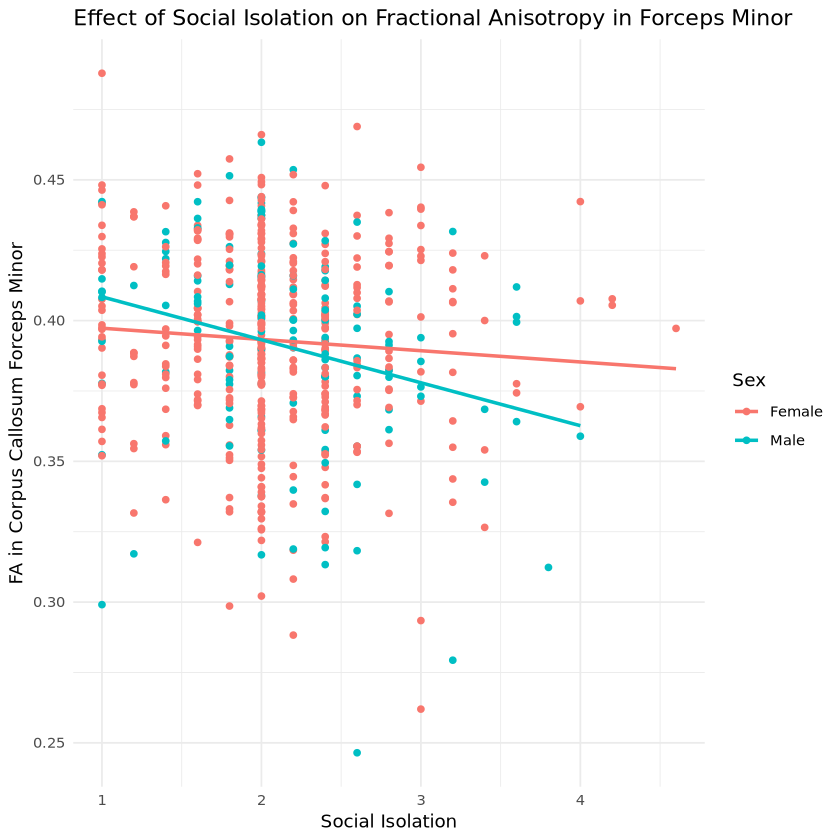

In [41]:
ggplot(dwi_data, aes(x = pheno_social_isolation, y = dwi_Corpus_Callosum_Forceps_Minor_dti_fa, color = pheno_msex, group = pheno_msex)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
    title = "Effect of Social Isolation on Fractional Anisotropy in Forceps Minor",
    x = "Social Isolation",
    y = "FA in Corpus Callosum Forceps Minor",
    color = "Sex"  # This will label the legend as "Sex" with "Male" and "Female" levels
  ) +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 5 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


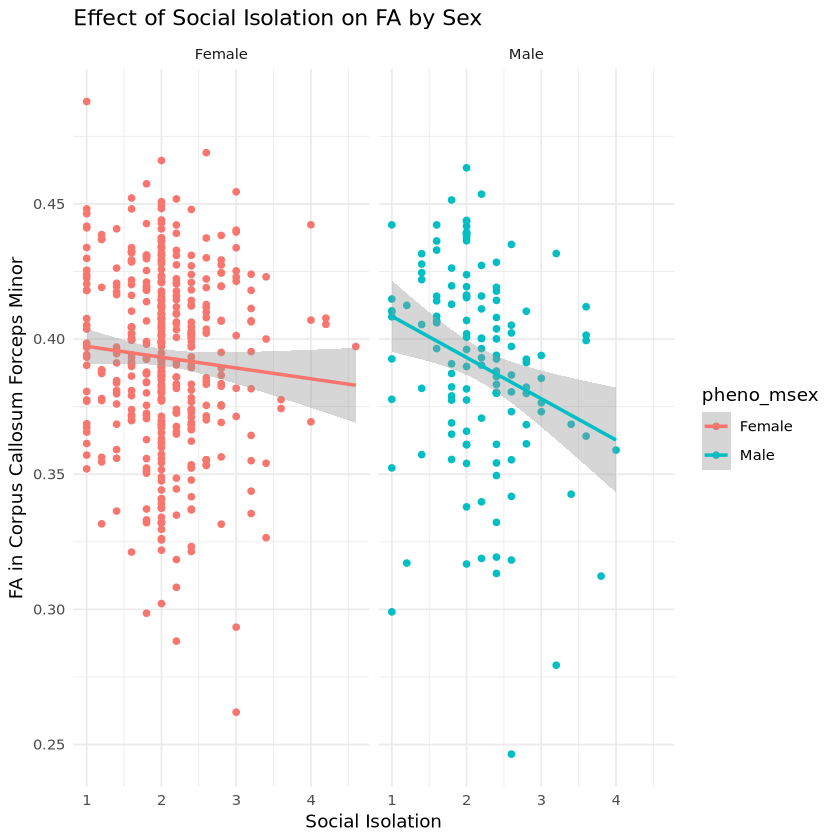

In [42]:
ggplot(dwi_data, aes(x = pheno_social_isolation, y = dwi_Corpus_Callosum_Forceps_Minor_dti_fa)) +
  geom_point(aes(color = pheno_msex)) +
  geom_smooth(aes(color = pheno_msex), method = "lm", se = TRUE) +
  facet_wrap(~ pheno_msex, labeller = labeller(pheno_msex = c("0" = "Female", "1" = "Male"))) +
  labs(
    title = "Effect of Social Isolation on FA by Sex",
    x = "Social Isolation",
    y = "FA in Corpus Callosum Forceps Minor"
  ) +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 5 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


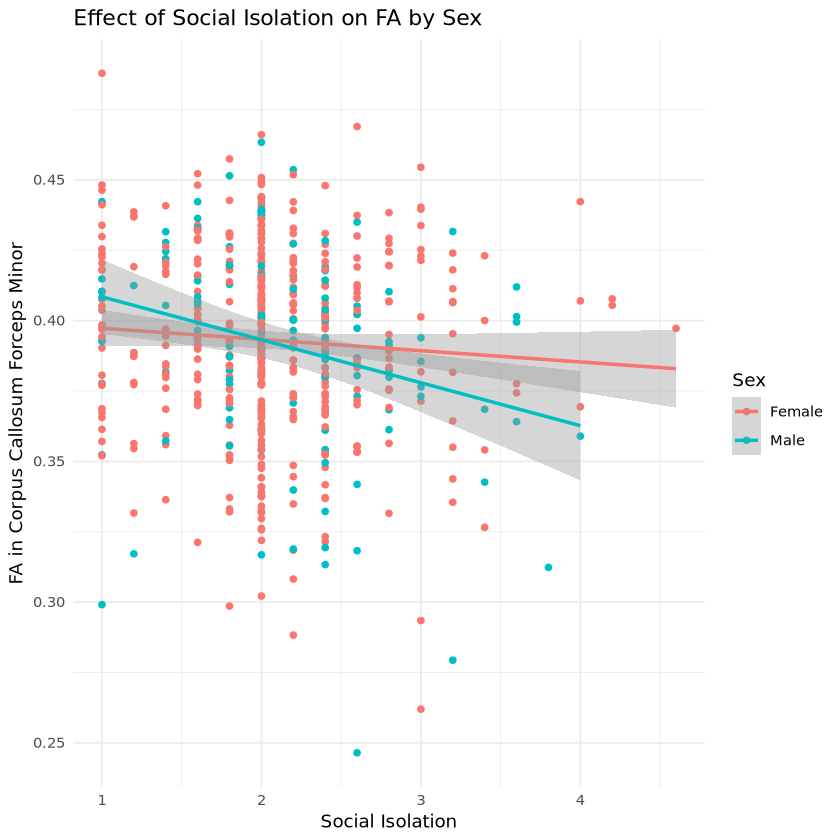

In [43]:
ggplot(dwi_data, aes(x = pheno_social_isolation, y = dwi_Corpus_Callosum_Forceps_Minor_dti_fa, color = pheno_msex, group = pheno_msex)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE) +  # Enable confidence intervals with se = TRUE
  labs(
    title = "Effect of Social Isolation on FA by Sex",
    x = "Social Isolation",
    y = "FA in Corpus Callosum Forceps Minor",
    color = "Sex"
  ) +
  theme_minimal()


In [40]:
# Create the plot
plot <- ggplot(dwi_data, aes(x = pheno_social_isolation, y = dwi_Corpus_Callosum_Forceps_Minor_dti_fa, color = pheno_msex, group = pheno_msex)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
    title = "Effect of Social Isolation on FA by Sex",
    x = "Social Isolation",
    y = "FA in Corpus Callosum Forceps Minor",
    color = "Sex"
  ) +
  theme_minimal()

# Save the plot with increased dimensions
ggsave("social_isolation_fa_by_sex.png", plot = plot, width = 10, height = 8, units = "in")


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 5 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


### Medial Diffusivity

In [23]:
model <- lm(dwi_Corpus_Callosum_Forceps_Minor_md ~ pheno_social_isolation * pheno_msex + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_md , data=dwi_data)
summary(model)


Call:
lm(formula = dwi_Corpus_Callosum_Forceps_Minor_md ~ pheno_social_isolation * 
    pheno_msex + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_md, 
    data = dwi_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.200892 -0.033475 -0.006358  0.026781  0.213302 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -1.1939448  0.2645320  -4.513  7.8e-06 ***
pheno_social_isolation            -0.0011836  0.0040889  -0.289   0.7723    
pheno_msex                        -0.0238588  0.0176716  -1.350   0.1775    
pheno_age_at_visit                 0.0008444  0.0003451   2.447   0.0147 *  
dwi_neighbor_corr                  1.4353950  0.2942473   4.878  1.4e-06 ***
dwi_white_matter_average_md        0.9572395  0.0581762  16.454  < 2e-16 ***
pheno_social_isolation:pheno_msex  0.0189272  0.0079410   2.383   0.0175 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 

In [24]:
# Fit an ANCOVA model with interaction term
ancova_model <- aov(dwi_Corpus_Callosum_Forceps_Minor_md ~ pheno_social_isolation * pheno_msex + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_md, data = dwi_data)
summary(ancova_model)

                                   Df Sum Sq Mean Sq F value   Pr(>F)    
pheno_social_isolation              1 0.0272  0.0272  11.282 0.000837 ***
pheno_msex                          1 0.0231  0.0231   9.549 0.002101 ** 
pheno_age_at_visit                  1 0.5310  0.5310 219.968  < 2e-16 ***
dwi_neighbor_corr                   1 0.1020  0.1020  42.240 1.81e-10 ***
dwi_white_matter_average_md         1 0.6560  0.6560 271.725  < 2e-16 ***
pheno_social_isolation:pheno_msex   1 0.0137  0.0137   5.681 0.017488 *  
Residuals                         551 1.3302  0.0024                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
5 observations deleted due to missingness

### Radial Diffusivity

In [44]:
model <- lm(dwi_Corpus_Callosum_Forceps_Minor_rd ~ pheno_social_isolation * pheno_msex + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_rd, data = dwi_data)
summary(model)


Call:
lm(formula = dwi_Corpus_Callosum_Forceps_Minor_rd ~ pheno_social_isolation * 
    pheno_msex + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_rd, 
    data = dwi_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.191452 -0.036591 -0.007901  0.031345  0.222242 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                           -1.4178783  0.2847000  -4.980 8.51e-07
pheno_social_isolation                -0.0007773  0.0044032  -0.177   0.8599
pheno_msexMale                        -0.0299153  0.0190297  -1.572   0.1165
pheno_age_at_visit                     0.0011776  0.0003643   3.232   0.0013
dwi_neighbor_corr                      1.5519094  0.3173179   4.891 1.32e-06
dwi_white_matter_average_rd            1.0101689  0.0584878  17.271  < 2e-16
pheno_social_isolation:pheno_msexMale  0.0216258  0.0085510   2.529   0.0117
                                         
(Intercept)        

In [45]:
# Fit the ANCOVA model
ancova_model <- aov(dwi_Corpus_Callosum_Forceps_Minor_rd ~ pheno_social_isolation * pheno_msex + pheno_age_at_visit + dwi_neighbor_corr + dwi_white_matter_average_rd, data = dwi_data)
summary(ancova_model)

                                   Df Sum Sq Mean Sq F value   Pr(>F)    
pheno_social_isolation              1 0.0419  0.0419  14.977 0.000122 ***
pheno_msex                          1 0.0207  0.0207   7.397 0.006739 ** 
pheno_age_at_visit                  1 0.6766  0.6766 241.696  < 2e-16 ***
dwi_neighbor_corr                   1 0.1320  0.1320  47.145 1.78e-11 ***
dwi_white_matter_average_rd         1 0.8380  0.8380 299.382  < 2e-16 ***
pheno_social_isolation:pheno_msex   1 0.0179  0.0179   6.396 0.011716 *  
Residuals                         551 1.5424  0.0028                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
5 observations deleted due to missingness

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 5 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


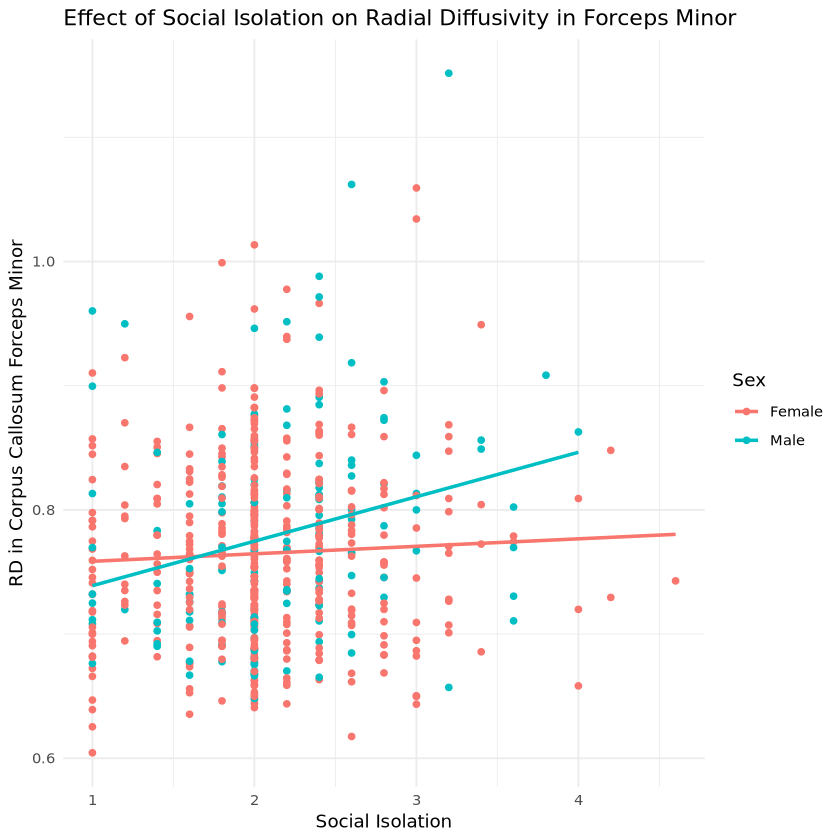

In [46]:
ggplot(dwi_data, aes(x = pheno_social_isolation, y = dwi_Corpus_Callosum_Forceps_Minor_rd, color = pheno_msex, group = pheno_msex)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
    title = "Effect of Social Isolation on Radial Diffusivity in Forceps Minor",
    x = "Social Isolation",
    y = "RD in Corpus Callosum Forceps Minor",
    color = "Sex"  # This will label the legend as "Sex" with "Male" and "Female" levels
  ) +
  theme_minimal()


### T1T2 Ratio

In [61]:
model <- lm(bold_AAL_Frontal_Med_Orb_R_t1t2ratio ~ pheno_social_isolation * pheno_msex + pheno_age_at_visit, data = fmri_data)
summary(model)


Call:
lm(formula = bold_AAL_Frontal_Med_Orb_R_t1t2ratio ~ pheno_social_isolation * 
    pheno_msex + pheno_age_at_visit, data = fmri_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3036 -0.8306  0.1013  0.7575  3.4312 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        7.454009   0.680229  10.958  < 2e-16 ***
pheno_social_isolation             0.012571   0.131138   0.096    0.924    
pheno_msex                         0.687695   0.533306   1.289    0.198    
pheno_age_at_visit                -0.051793   0.008303  -6.238 1.15e-09 ***
pheno_social_isolation:pheno_msex -0.396529   0.242077  -1.638    0.102    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.236 on 391 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.1125,	Adjusted R-squared:  0.1034 
F-statistic: 12.39 on 4 and 391 DF,  p-value: 1.7e-09


In [13]:
#DWI Forceps Minor T1 T2 Ratio
dwi_data_male <- subset(dwi_data, pheno_msex == 1)
model <- lm(forceps_minor_t1t2_ratio ~ pheno_social_isolation + pheno_age_at_visit, data = dwi_data_male)
summary(model)


Call:
lm(formula = forceps_minor_t1t2_ratio ~ pheno_social_isolation + 
    pheno_age_at_visit, data = dwi_data_male)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.635  -3.979  -1.660   0.256 109.807 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)
(Intercept)             -8.7625    12.2633  -0.715    0.476
pheno_social_isolation  -2.1723     1.8462  -1.177    0.242
pheno_age_at_visit       0.2309     0.1552   1.488    0.139

Residual standard error: 12.48 on 122 degrees of freedom
  (10 observations deleted due to missingness)
Multiple R-squared:  0.02336,	Adjusted R-squared:  0.007353 
F-statistic: 1.459 on 2 and 122 DF,  p-value: 0.2364


In [14]:
dwi_data_female <- subset(dwi_data, pheno_msex == 0)
model <- lm(forceps_minor_t1t2_ratio ~ pheno_social_isolation + pheno_age_at_visit, data = dwi_data_female)
summary(model)


Call:
lm(formula = forceps_minor_t1t2_ratio ~ pheno_social_isolation + 
    pheno_age_at_visit, data = dwi_data_female)

Residuals:
    Min      1Q  Median      3Q     Max 
-57.223  -1.423  -0.204   0.788  59.953 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)             6.29142    3.72155   1.691   0.0918 .
pheno_social_isolation  0.37655    0.60987   0.617   0.5373  
pheno_age_at_visit     -0.04348    0.04602  -0.945   0.3454  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.65 on 372 degrees of freedom
  (53 observations deleted due to missingness)
Multiple R-squared:  0.00293,	Adjusted R-squared:  -0.00243 
F-statistic: 0.5466 on 2 and 372 DF,  p-value: 0.5794


In [15]:
model <- lm(forceps_minor_t1t2_ratio ~ pheno_social_isolation * pheno_msex + pheno_age_at_visit, data = dwi_data)
summary(model)


Call:
lm(formula = forceps_minor_t1t2_ratio ~ pheno_social_isolation * 
    pheno_msex + pheno_age_at_visit, data = dwi_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-57.170  -1.838  -0.648   0.646 111.483 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)                        1.35953    4.23468   0.321   0.7483  
pheno_social_isolation             0.21512    0.77695   0.277   0.7820  
pheno_msex                         5.50597    3.20265   1.719   0.0862 .
pheno_age_at_visit                 0.02140    0.05144   0.416   0.6776  
pheno_social_isolation:pheno_msex -1.78025    1.44132  -1.235   0.2174  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.508 on 495 degrees of freedom
  (63 observations deleted due to missingness)
Multiple R-squared:  0.01077,	Adjusted R-squared:  0.002774 
F-statistic: 1.347 on 4 and 495 DF,  p-value: 0.2514


In [16]:
model <- lm(forceps_minor_t1t2_ratio ~ pheno_social_isolation + pheno_age_at_visit, data = dwi_data)
summary(model)


Call:
lm(formula = forceps_minor_t1t2_ratio ~ pheno_social_isolation + 
    pheno_age_at_visit, data = dwi_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-57.687  -1.946  -0.675   0.668 114.419 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)
(Intercept)             2.87706    4.14810   0.694    0.488
pheno_social_isolation -0.15623    0.66143  -0.236    0.813
pheno_age_at_visit      0.01723    0.05158   0.334    0.738

Residual standard error: 8.535 on 497 degrees of freedom
  (63 observations deleted due to missingness)
Multiple R-squared:  0.0002847,	Adjusted R-squared:  -0.003738 
F-statistic: 0.07077 on 2 and 497 DF,  p-value: 0.9317


In [58]:
fmri_data <- as.data.frame(fmri_data)
fmri_data <- subset(fmri_data, bold_AAL_Frontal_Med_Orb_R_t1t2ratio < 30)

In [59]:
colnames(fmri_data)

[1] "subject"                                                          
   [2] "fmri_qc"                                                          
   [3] "dwi_qc"                                                           
   [4] "anat_qc"                                                          
   [5] "has_pheno"                                                        
   [6] "pheno_fu_year"                                                    
   [7] "pheno_age_at_visit"                                               
   [8] "pheno_cogn_global"                                                
   [9] "pheno_cesdsum"                                                    
  [10] "pheno_r_depres"                                                   
  [11] "pheno_bmi"                                                        
  [12] "pheno_soc_net"                                                    
  [13] "pheno_social_isolation"                                           
  [14] "pheno_tot_adverse_exp"                                            
  [15] "pheno_emotional_neglect"                                          
  [16] "pheno_family_pro_sep"                                             
  [17] "pheno_financial_need"                                             
  [18] "pheno_parental_intimidation"                                      
  [19] "pheno_parental_violence"                                          
  [20] "pheno_income_bl"                                                  
  [21] "pheno_early_hh_ses"                                               
  [22] "pheno_ladder_composite"                                           
  [23] "pheno_q40inc"                                                     
  [24] "pheno_cogdx"                                                      
  [25] "pheno_msex"                                                       
  [26] "pheno_educ"                                                       
  [27] "pheno_niareagansc"                                                
  [28] "brainmeasures_lh_euler"                                           
  [29] "brainmeasures_rh_euler"                                           
  [30] "brainmeasures_lh_holes"                                           
  [31] "brainmeasures_rh_holes"                                           
  [32] "brainmeasures_Cortex_NumVert_lh"                                  
  [33] "brainmeasures_Cortex_PialSurfArea_lh"                             
  [34] "brainmeasures_Cortex_MeanThickness_lh"                            
  [35] "brainmeasures_Cortex_NumVert_rh"                                  
  [36] "brainmeasures_Cortex_PialSurfArea_rh"                             
  [37] "brainmeasures_Cortex_MeanThickness_rh"                            
  [38] "brainmeasures_Left_Lateral_Ventricle_NVoxels"                     
  [39] "brainmeasures_Left_Inf_Lat_Vent_NVoxels"                          
  [40] "brainmeasures_Left_Cerebellum_White_Matter_NVoxels"               
  [41] "brainmeasures_Left_Cerebellum_Cortex_NVoxels"                     
  [42] "brainmeasures_Left_Thalamus_NVoxels"                              
  [43] "brainmeasures_Left_Caudate_NVoxels"                               
  [44] "brainmeasures_Left_Putamen_NVoxels"                               
  [45] "brainmeasures_Left_Pallidum_NVoxels"                              
  [46] "brainmeasures_Third_Ventricle_NVoxels"                            
  [47] "brainmeasures_Fourth_Ventricle_NVoxels"                           
  [48] "brainmeasures_Brain_Stem_NVoxels"                                 
  [49] "brainmeasures_Left_Hippocampus_NVoxels"                           
  [50] "brainmeasures_Left_Amygdala_NVoxels"                              
  [51] "brainmeasures_CSF_NVoxels"                                        
  [52] "brainmeasures_Left_Accumbens_area_NVoxels"                        
  [53] "brainmeasures_Left_VentralDC_NVoxels"                             
  [54] "brainmeasures_Left_v

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


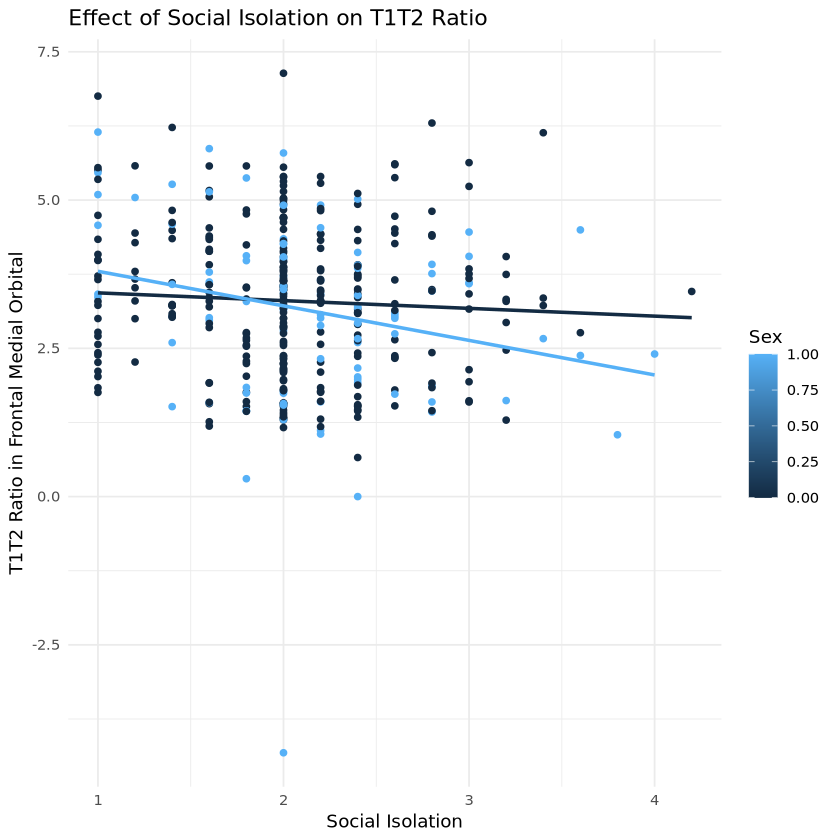

In [60]:
ggplot(fmri_data, aes(x = pheno_social_isolation, y = bold_AAL_Frontal_Med_Orb_R_t1t2ratio, color = pheno_msex, group = pheno_msex)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
    title = "Effect of Social Isolation on T1T2 Ratio",
    x = "Social Isolation",
    y = "T1T2 Ratio in Frontal Medial Orbital",
    color = "Sex"  # This will label the legend as "Sex" with "Male" and "Female" levels
  ) +
  theme_minimal()
